<H4><b>
<big>Comparative Analysis on Unsupervised Machine Learning on Clustering Algorithms using K-means & DBSCAN Clustering for</big>
NURSERY RANKING APPLICATION FOR NURSERY SCHOOL ADMISSION</b><br/></H4>
<h5>

The primary objective of this project is to apply clustering techniques to the nursery dataset,downloaded UCI Machine Learning repository to rank admission applications for nursery school.  This dataset comprises nine variables: 'parents,' 'has_nurs,' 'form,' 'children,' 'housing,' 'finance,' 'social,' and 'health,' with a focus on the 'class' variable, that decides whether application is recommended/ proritized/ not recommended. The goal is to identify natural groupings or clusters within the dataset centered around the 'class' variable, in order to gain insights into the underlying patterns and relationships between nursery applications. The project aims to determine the most suitable clustering model for this specific dataset, which can be used for future analysis or decision-making in the context of nursery admissions using <big>K-means and DBSCAN Clustering Methods</big>
</h5>
https://archive.ics.uci.edu/dataset/76/nursery (header need to be added with the csv file)</br>
Nursery Database was derived from a hierarchical decision model </br>
originally developed to rank applications for nursery schools. Used in 1980's</br>
9 Attributes or 9 variables</br>
1. parents:     usual, pretentious, great_pret.</br>
2. has_nurs:    proper, less_proper, improper, critical, very_crit.</br>
3. form:        complete, completed, incomplete, foster.</br>
4. children:    1, 2, 3, more.</br>
5. housing:     convenient, less_conv, critical.</br>
6. finance:     convenient, inconv.</br>
7. social:      nonprob, slightly_prob, problematic.</br>
8. health:      recommended, priority, not_recom.</br>
9. class:       recommend, priority, not_recomm

<h3><b>For K-means: Objectives A, B & C are implemented<br/>
For DBSCAN: Objective D, E & F are implemented </big></b></h3>
<b>
 OBJECTIVE A: K-means Clsutering on all 9 Variables <br/>
 OBJECTIVE B: KMEANS BETW 4 Variables<br/>
 OBJECTIVE C: KMEANS BETW 2 Variables  <br/>
 OBJECTIVE D: DBSCAN BETW all 9 Variables <br/>
 OBJECTIVE E: DBSCAN BETW 3 Variables<br/>
 OBJECTIVE F: DBSACAN BETW 2 Variables  <br/>
</b>

<b>Following 3 Metrics are used for evaluating above Clustering-experiments’ performances<br/>
<big>Silhouette Coefficient(silhouette score):</big> is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished.<br/>
<big>Davies-Bouldin Index:</big> DBI has a clear interpretation: a lower DBI value indicates more compact and well-separated clusters. <br/>
<big>Calinski-Harabasz Index:</big> Higher value of CH index means the clusters are dense and well separated, although there is no “acceptable” cut-off value
</b>


In [ ]:
pip install scikit-learn

<b> Importing the Required Python Libraries for Clustering and its Visualizations</b>

In [ ]:
# Importing the Required Python Libraries for Clustering and its Visualizations
#NumPy for array. Pandas for DataFrame., MatplotLib  & Seaborn for visualizations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Running the below command before importing KMeans to limit the number of threads #environment variable specifies the
#number of threads to use for parallel regions
import os
os.environ["OMP_NUM_THREADS"] ='1'
%matplotlib inline

#Below is optional. It is useful to supress warnings!
import warnings
warnings.filterwarnings('ignore')

<H3>STEP1: IMPORTING THE NURSERY DATASET (DATA LOADING)</H3>

In [ ]:
#STEP1: IMPORTING THE NURSERY DATASET
#Data Collection and Loading Dataset into a Pandas Dataframe #https://archive.ics.uci.edu/dataset/76/nursery

nursery_df = pd.read_csv("Nursery.csv")

#EXPLORING THE DATASET



In [ ]:
#EXPLORING THE DATASET #Overviewsing the Dataset
nursery_df.head(n=10) # head() shows only 5

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom


<b>
There are 9 Columns(attributes)<br/>All most all the columns are CATEGORICAL variables
<b>

In [ ]:
#Identifying the Shape of the Dataset  #12960 instances and 9 columns
nursery_df.shape

(12960, 9)

 <b>Nursery dataset contains 12,960 instances and 9 columns</b>

<b><H3>STEP2: DATA PREPROCESSING</H3></b>
<H4><b>STEP2.1: Data Cleaning By Imputing the Missing or Null Values</b></H4>
<B>TOTAL 9 COLUMNS: parents,	has_nurs,	form,	children,	housing,	finance,	social,	health AND	class</B></BR>


In [ ]:
#Step 2.1: Data Cleaning: Imputing the Missing Values
# Checking the Data set information to diagonise for each of its Attributes' Data Types and NULL or missing values details
nursery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12959 non-null  object
 3   children  12959 non-null  object
 4   housing   12960 non-null  object
 5   finance   12959 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   class     12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


<B>FINDING THE STATISTICAL INFORMATION OF THE COLUMNS.<BR/>
 NUMBER OF UNIQUE VALUES AND TOPMOST FREQUENTLY OCCURING UNIQUE VALUE IN EACH COLUMN</B>

In [ ]:
#FINDING THE STATISTICAL INFORMATION OF THE COLUMNS. NUMBER OF UNIQUE VALUES AND TOPMOST FREQUENTLY OCCURING UNIQUE VALUE IN EACH COLUMN
nursery_df.describe()
# SEEMS ALL THE VARIABLES ARE CATEGORICAL AND NO NUMERICAL


,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12959,12959,12960,12959,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,inconv,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


#Analysis of the Above STATISTICAL INFORMATION
<b>
The "not recom" That is not recommended type of ranking is the highest in "class" column <BR/>
Also, we can notice though "usual" category of "parent' are highest with highest "convinent" category of housing and with highest "proper" category of "has_nurs" however it is understood that "not_recomm" category of "class" ranking is the highest. <br/>
This is could be because "inconv" category of "finance"
</b>

<B>DIAGONISING THE UNIQUE VALUES OF ALL 9 CATEGORICAL VARIABLES OF THE NURSERY DATASET</B>

In [ ]:
#DIAGONISING THE UNIQUE VALUES OF ALL 9 CATEGORICAL VARIABLES
for i in range(8):
    unique = nursery_df.iloc[:,i].unique()
    print("Unique values of {} {}".format(i, unique))


Unique values of 0 ['usual' 'pretentious' 'great_pret']
Unique values of 1 ['proper' 'less_proper' 'improper' 'critical' 'very_crit']
Unique values of 2 ['complete' 'completed' 'incomplete' 'foster' nan]
Unique values of 3 ['1' '2' '3' 'more' nan]
Unique values of 4 ['convenient' 'less_conv' 'critical']
Unique values of 5 ['convenient' 'inconv' nan]
Unique values of 6 ['nonprob' 'slightly_prob' 'problematic']
Unique values of 7 ['recommended' 'priority' 'not_recom']


<b>Checking & Handling missing values (Null values)  in the Dataset (There 3 null values totally) </b>

In [ ]:
#Checking missing values (Null values) in the Dataset
nursery_df.isnull().sum()
#There 3 null values totally. Null values exit in the 3 columns: form, children and finance

parents     0
has_nurs    0
form        1
children    1
housing     0
finance     1
social      0
health      0
class       0
dtype: int64

<b>Exploring the rows having the null values </b>

In [ ]:
#Exploring the rows having the null values
nursery_df[nursery_df.isnull().any(axis=1)]

,parents,has_nurs,form,children,housing,finance,social,health,class
171,usual,proper,complete,NaN,convenient,inconv,nonprob,recommended,priority
4657,pretentious,proper,NaN,3,convenient,inconv,slightly_prob,priority,priority
8785,great_pret,proper,complete,3,critical,NaN,nonprob,priority,spec_prior


In [ ]:
##Step 2.1: Data Cleaning: Imputing the Missing Values using the SimpleImputer
# Mode or the most frequent is used in the following code to impute missing in the categorical variables
#imputing using  SimpleImputer, hence importing SimpleImputer class from sklearn.impute python library.
from sklearn.impute import SimpleImputer
import numpy as np #for specifying the NULL value np.nan
Category_Imputer = SimpleImputer(missing_values=np.nan, strategy ="most_frequent")
Category_Imputer =Category_Imputer.fit(nursery_df[["form","children","finance"]])
nursery_df[["form","children","finance"]] = Category_Imputer.transform(nursery_df[["form","children","finance"]])
#verifying to ensure that the Missing or Null values are imputed Successfully
nursery_df.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64

In [ ]:
#Having a copy of dataframe for Analysing the resulting Cluster patterns and its Interpretation that comes after evaluation
nursery_org_df = nursery_df.copy()

In [ ]:
nursery_org_df.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


<b><h4>Step 2.2: Preliminary Data Transformation By Encoding the Categorical Datatype variables to Numeric Datatype</h4>
<p align="justify">

Since, all the columns are categorical Hence, encoding is required to be performed  in order to compute  the correlation matrix and displaying the correlation visualization to discover the actual relationships existing between the Attributes
</p>
</b>

In [ ]:
#Data Encoding: Changing Categorical Data Type to Numerical Data Type Variables
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
df_columns = ["parents","has_nurs","form","children","housing","finance","social","health","class"]
nursery_df[df_columns] =  enc.fit_transform(nursery_df[df_columns])
nursery_df.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
1,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
4,2.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0


In [ ]:
# CHECKING THE DATATYPES OF ALL THE VARIABLES IN THE NURSERY DATAFRAME
nursery_df.info()
#DATATYPES OF ALL THE COLUMNS ARE NOW FLOAT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   parents   12960 non-null  float64
 1   has_nurs  12960 non-null  float64
 2   form      12960 non-null  float64
 3   children  12960 non-null  float64
 4   housing   12960 non-null  float64
 5   finance   12960 non-null  float64
 6   social    12960 non-null  float64
 7   health    12960 non-null  float64
 8   class     12960 non-null  float64
dtypes: float64(9)
memory usage: 911.4 KB


<b> STATISTICAL INFORMATION ON ENCODED DATASET
</b>

In [ ]:
# DISPLAYING THE COUNT, MIN, MAX, MEAN, MEDIAN, MODE, STANDARD DEVIATION AND THE 3 QUARTILES(25%, 50%, 75%)
nursery_df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000
mean,1.000000,2.000000,1.499923,1.499769,1.000000,0.500077,1.000000,1.000000,1.366821
std,0.816528,1.414268,1.118146,1.118077,0.816528,0.500019,0.816528,0.816528,1.294212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,3.000000,2.250000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000
max,2.000000,4.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000


<b><H4>STEP2.3: Outlier Detection in the Dataset </H4></b>

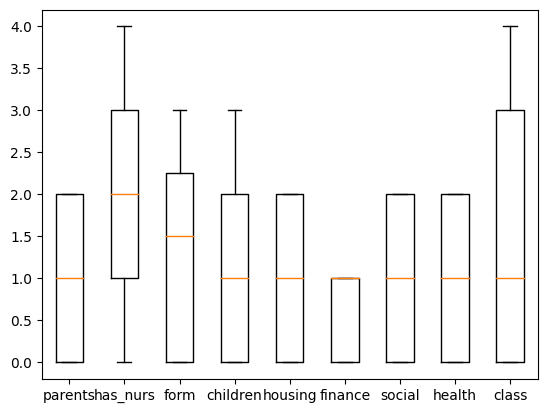

In [ ]:
#STEP2.3: DETECTING OUTLIERS
##Exploring Outliers visually using the Boxplot for the 9 numerical variables of the Nursery DataFrame TO CHECK THE EXISTANCE OF OUTLIERS

# boxplot is used to summaraize the distributions of the numerical variable and its outliers, if exist
plt.boxplot(x=(nursery_df['parents'], nursery_df['has_nurs'],nursery_df['form'],nursery_df['children'],
               nursery_df['housing'],nursery_df['finance'],nursery_df['social'],nursery_df['health'],
               nursery_df['class']))
plt.xticks([1,2,3,4,5,6,7,8,9],["parents","has_nurs","form","children","housing","finance","social","health","class"])
plt.show()

<b><H4>THERE ARE NO OUTLIERS</H4></b>

<b><h4>Step2.4: Data Exploration - Exploratory data analysis (EDA) for all 9 columns using the Histograms with curve on the histograms representing the kernel density. This is a Univariate data explorations</h4></b>

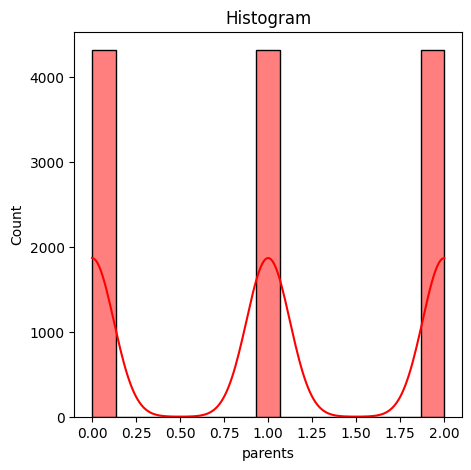

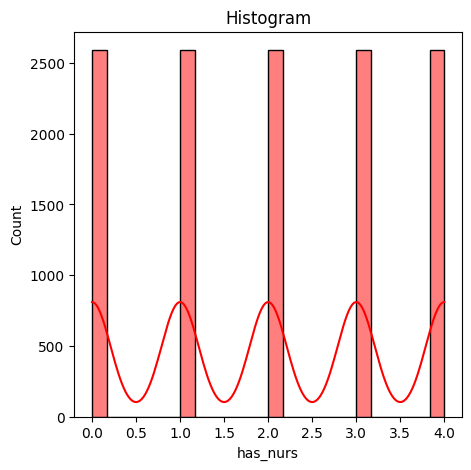

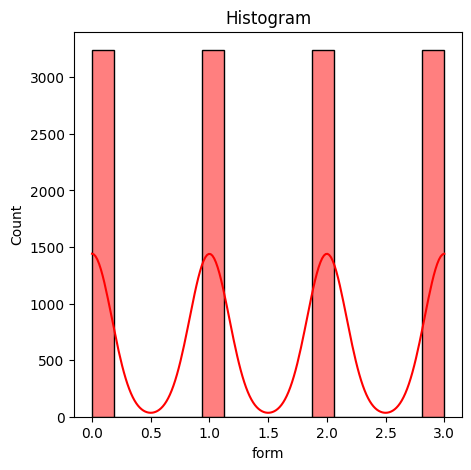

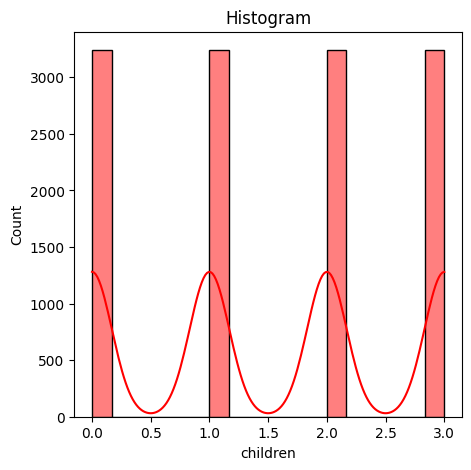

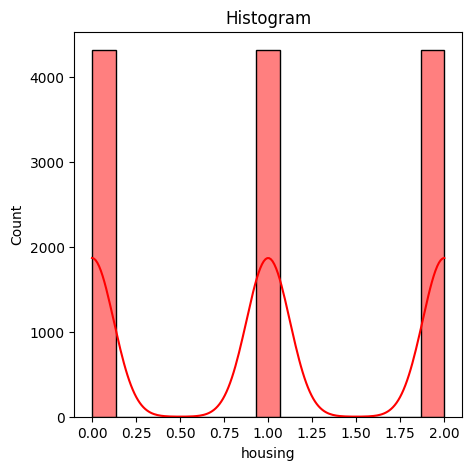

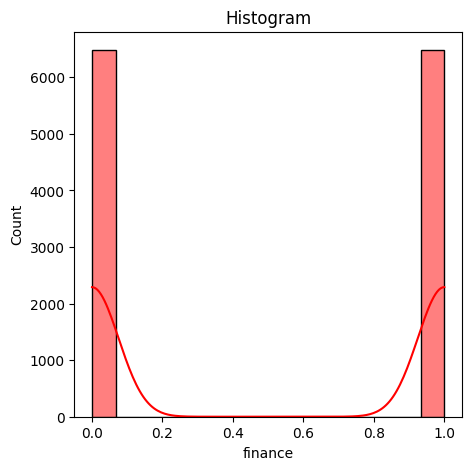

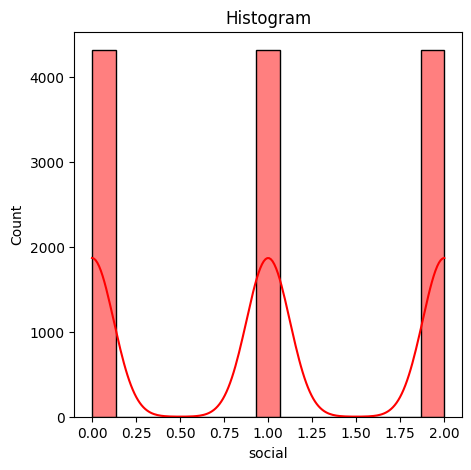

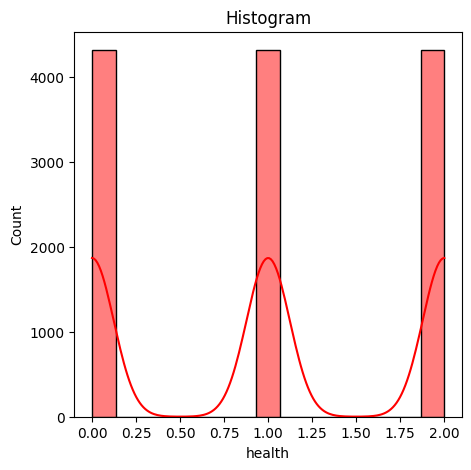

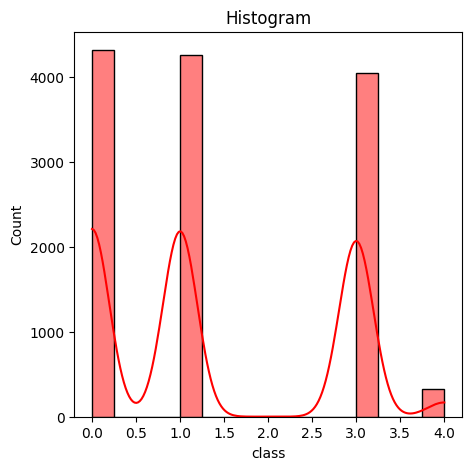

In [ ]:
#Data Exploration by plotting the histogram for each variables in the dataframe
#the "kde" parameter of the histplot is set to true to add a curve representing
# the kernel density estimate of the data, calculated with the default
# parameters of the kdeplot function.
nursery_df_columns = nursery_df.columns
for col in nursery_df_columns:
    plt.figure(figsize=(5, 5))
    sb.histplot(nursery_df[col], kde = True, color='r')
    plt.title('Histogram')
    plt.show()

<big><b>Analysis on the above histogram visual exploration  of the data:</big><br/>
 The columns namely parents,	has_nurs,	form,	children,	<br/>housing, social, health and class are Multimodal distribution.
since we can see multiple waves or peaks in the plot <br/>
Whereas the finance column data shows Bimodal distribution<br/></b>


<H2><B>STEP2.5:FEATURE ENGINEERING: EVALUATING CORRELATION COEFFICIENTS AND PERFORMING FEATURE SELECTION <BR/></H2>
<H3>
The goal of feature selection for unsupervised learning is to find the smallest feature subset that best uncovers “interesting natural” groupings (clusters) from data according to the chosen criterion </H3>
<H3>
Therefore, computing  the correlation matrix and displaying the correlation visualization are mandatory steps that greatly helps to discover the actual relationships existing between the Attributes.
</B></H3>


In [ ]:
#EVALUATING THE CORRELATION BETWEEN THE 9 VARIABLES. Multivariate data Exploration
nursery_df.corr()

,parents,has_nurs,form,children,housing,finance,social,health,class
parents,1.000000e+00,-1.687340e-16,3.138605e-15,-0.000254,-7.383490e-16,-1.890038e-04,1.196946e-15,-1.974013e-15,-1.415160e-01
has_nurs,-1.687340e-16,1.000000e+00,-4.879757e-05,-0.000146,-5.514875e-16,1.091214e-04,2.236483e-16,5.665915e-16,8.347501e-03
form,3.138605e-15,-4.879757e-05,1.000000e+00,0.000247,8.451987e-05,-2.760301e-04,-8.451987e-05,2.201390e-17,1.873636e-02
children,-2.535753e-04,-1.464017e-04,2.468841e-04,1.000000,2.535753e-04,-1.379969e-04,2.535753e-04,-2.535753e-04,3.125528e-02
housing,-7.383490e-16,-5.514875e-16,8.451987e-05,0.000254,1.000000e+00,-3.778514e-19,4.625215e-19,6.373550e-18,2.468133e-02
finance,-1.890038e-04,1.091214e-04,-2.760301e-04,-0.000138,-3.778514e-19,1.000000e+00,-1.890038e-04,5.791485e-18,2.034697e-02
social,1.196946e-15,2.236483e-16,-8.451987e-05,0.000254,4.625215e-19,-1.890038e-04,1.000000e+00,8.018275e-18,-2.549185e-16
health,-1.974013e-15,5.665915e-16,2.201390e-17,-0.000254,6.373550e-18,5.791485e-18,8.018275e-18,1.000000e+00,6.179096e-01
class,-1.415160e-01,8.347501e-03,1.873636e-02,0.031255,2.468133e-02,2.034697e-02,-2.549185e-16,6.179096e-01,1.000000e+00


<b>Multivariate data Exploration</b>

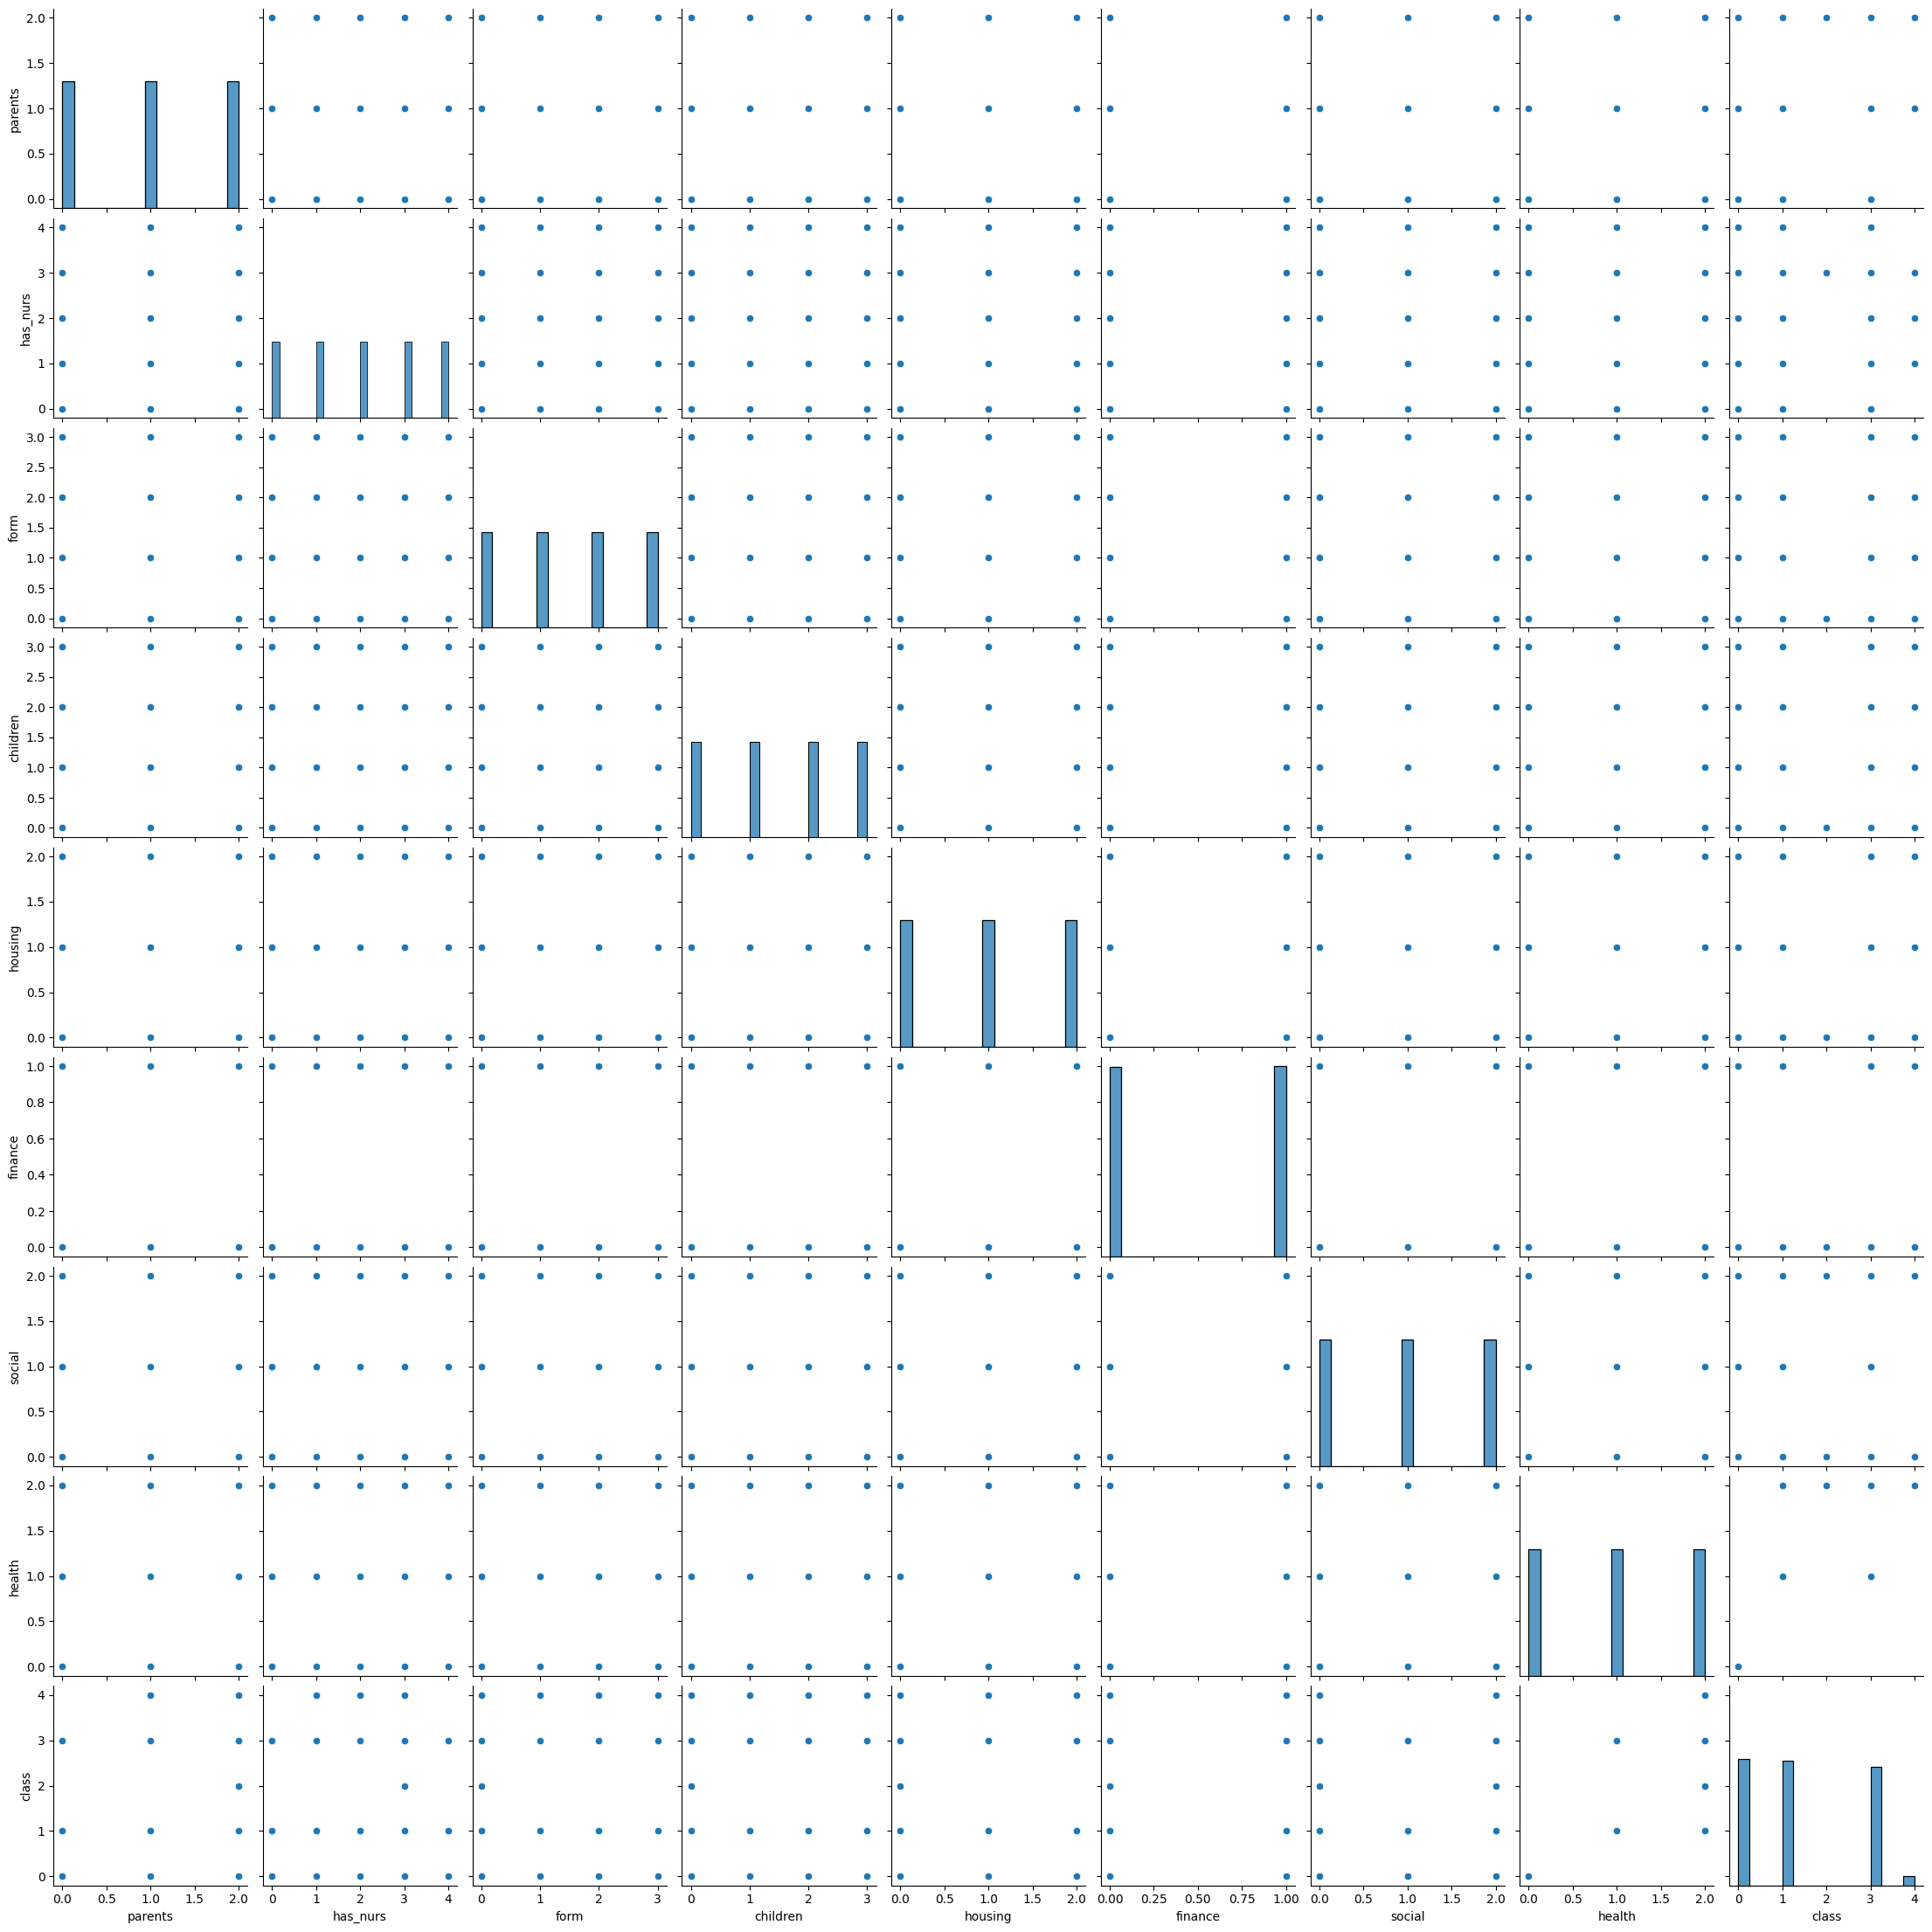

In [ ]:
 #VISUALLY EVALUATING the Correlation Coefficient OF All 9 variables Using The Seaborn Library's Pairplot
sb.pairplot(nursery_df.iloc[:,0:9])

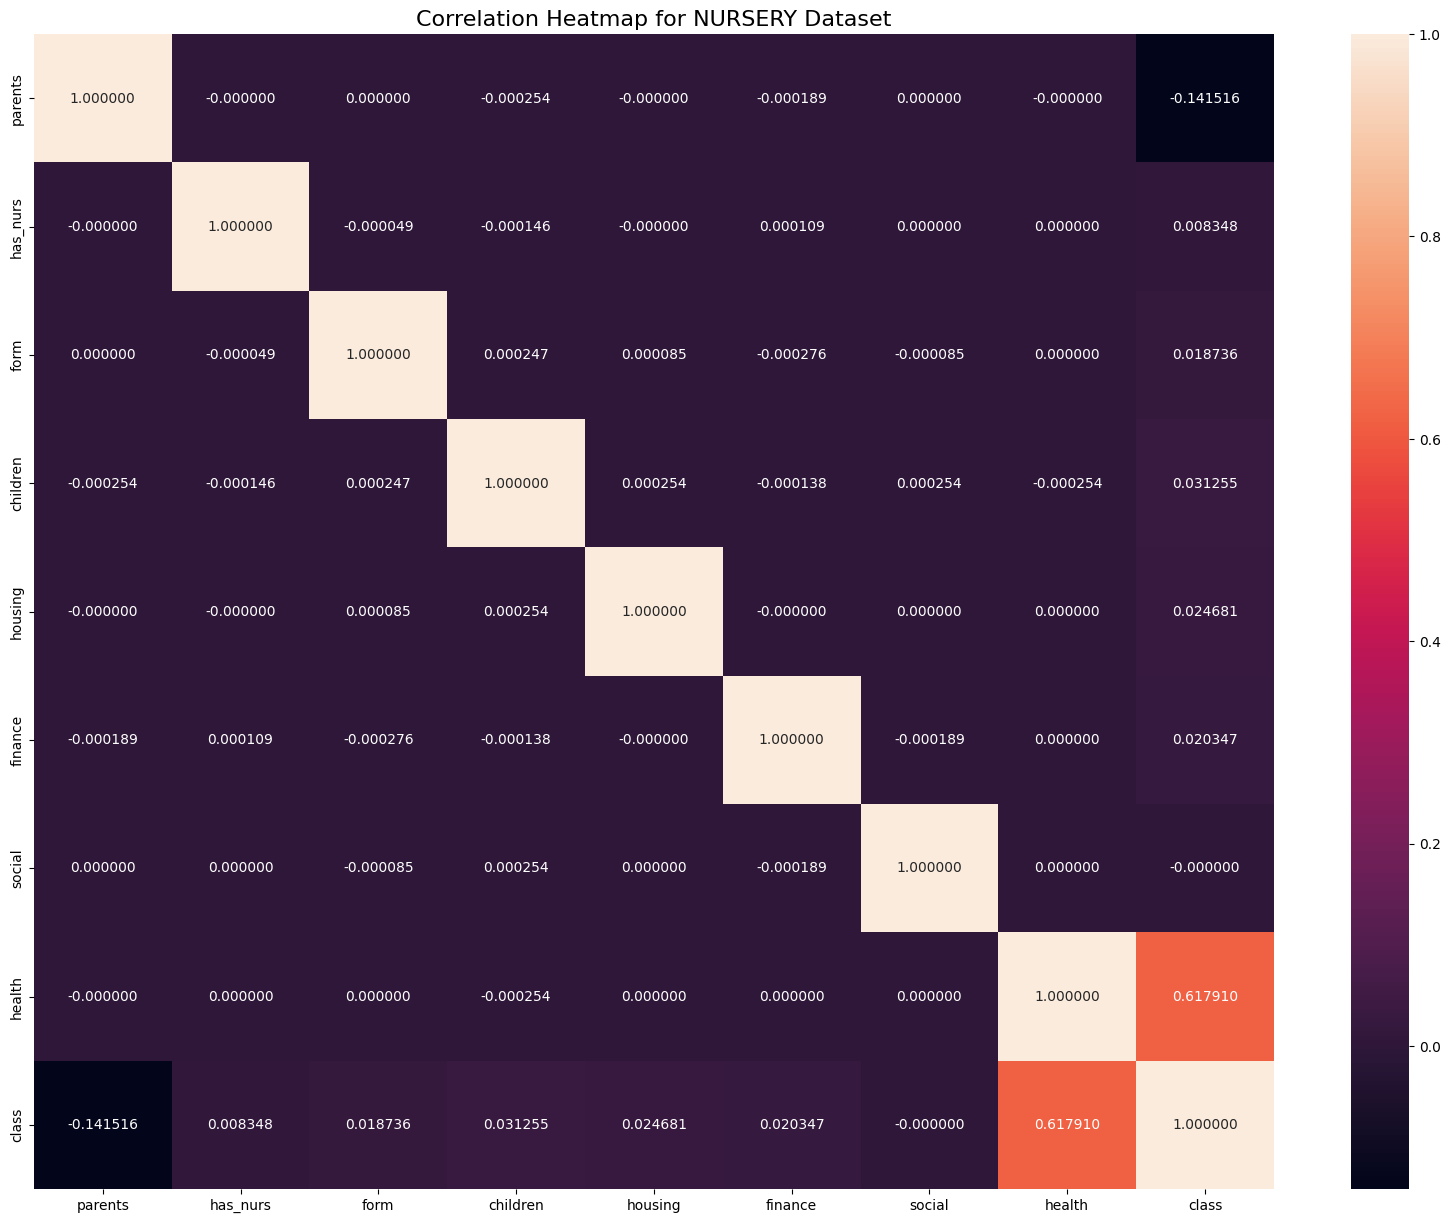

In [ ]:
 # VISUALLY EVALUATING the Correlation Coefficient between 9 variables Through the Heat map
#For more clearity in the numerical values
corr_matrix = nursery_df.corr()
plt.figure(figsize=(20,15))
heatmap =sb.heatmap(corr_matrix, annot=True, fmt=".6f")
heatmap.set_title('Correlation Heatmap for NURSERY Dataset', fontdict={'fontsize':16});
plt.show()


<p align="justify">


<b><big>Correlation Analysis: </big>In the above correlation matrix, when comparing right side last column(class) of all the rows,
"health" is having the highest postively correlation with the class followed by "children", "housing" and "finace" variables.
And "parents" most negatively correlated.
Main objective of this Task is to find the most logically thats is meaningfull related variables to find the homogenous clusters.
Let's now print the correlation order with respect to "Class" label
based on that to select the variables</b> </p>

In [ ]:
#Evaluating and Sorting the correlation coefiecients focusing on the "class" variable
nursery_df.corr()['class'].sort_values(ascending=False).round(9)  #rounded upto 9 decimal points

class       1.000000
health      0.617910
children    0.031255
housing     0.024681
finance     0.020347
form        0.018736
has_nurs    0.008348
social     -0.000000
parents    -0.141516
Name: class, dtype: float64


<h3><b><big> From the above correlation sorting result centered with "class" column ,</big></br>
1.  "health" is the highest positively correlated followed by "children", "housing", "finance" and "form"</br>
2.   "has_nurs" is the least positively correlated variable</br>
3.   However, "parents" is the highest negatively correlated variable and "social" is the very least negatively correlated variable.</br>
4. Thus, Strong and better correlation exist between "health", "parents", "children, "housing" and "finance" and the "class" variable.

Thus, K-means clustering models can be implemented on Nursery dataset in the following three ways <br/>
1. Objective A: With all 9 variables  <br/>
2. Objective B: With 4 logically correlated variables(retaining "class")<br/>
3. Objective C: With 2 logically correlated variables (retaining "class" as mandate variable)<br/>

</b> </h3>
<p align="justify"><big>"class" variable is retained as mandate variable in the B & C objective for the reason the Application selection process is centred around it.<br/>
On the Logical perspective, with an aim to find the homogenous cluster, the variables having greater correlation that is value greater than 0.1 and less than -0.1 are selected. Hence,"health" and "parents" are the next recommended choices for both B & C Objective</big></p>

<b><h3>CLUSTERING OBJECTIVE A: K-means Clustering Between All 9 Variables</h3></b>
<h4><b>Objective_A_STEP1: Standardization through Scaling all 9 Variables (Data Transformation in Data Preprocessing )</b> </h4>
<p align="justify">

<b> Though the dataset is without any null value encoded in to numerical variables. Yet the variables are not in the same scale which can cause accuracy problems in machine learning algorithms.
The preprocessing module of Python provides the StandardScaler utility class,
which is a quick and easy way to perform the following operation on an array-like dataset and make them normalized.</b>
</p>

In [ ]:
#Objective_A_STEP1: Standardization/Normalization by scaling the 9 variables of the Nursery dataset.
#This step is the Data Transformation part of the Data Preprocessing Its important to standardize/normalize the datset before applying the Kmeans clustering
#Importing the StandardScaler Class from the sklearn.preprocessing Python package
from sklearn.preprocessing import StandardScaler

#Creating an Object instance of StandardScaler class
sc_X = StandardScaler()

#Fitting & transforming the sc_X instance on the Nursery dataset
nursery_sc = sc_X.fit_transform(nursery_df)

#Listing & viewing the the first 10 rows of the  scalled array
print(nursery_sc[:5, :])

[[ 1.22474487  0.70710678 -1.34148897 -1.34143377 -1.22474487 -1.00015433
  -1.22474487  1.22474487  0.48925783]
 [ 1.22474487  0.70710678 -1.34148897 -1.34143377 -1.22474487 -1.00015433
  -1.22474487  0.         -0.28344281]
 [ 1.22474487  0.70710678 -1.34148897 -1.34143377 -1.22474487 -1.00015433
  -1.22474487 -1.22474487 -1.05614345]
 [ 1.22474487  0.70710678 -1.34148897 -1.34143377 -1.22474487 -1.00015433
   1.22474487  1.22474487  0.48925783]
 [ 1.22474487  0.70710678 -1.34148897 -1.34143377 -1.22474487 -1.00015433
   1.22474487  0.         -0.28344281]]


<b><h4>Objective_A_STEP2: Elbow method to evaluate K value to find Optimal Best number of Clusters based on wcss value which is the sum of squares. Computing the K-means cluster on Nursery dataset with K -value(cluster values) ranging between 1 to 11. Computation & plotting of the wcss helps to find the best K (Elbow point on the plot) that provides optimal well separated clusters </h4><b>


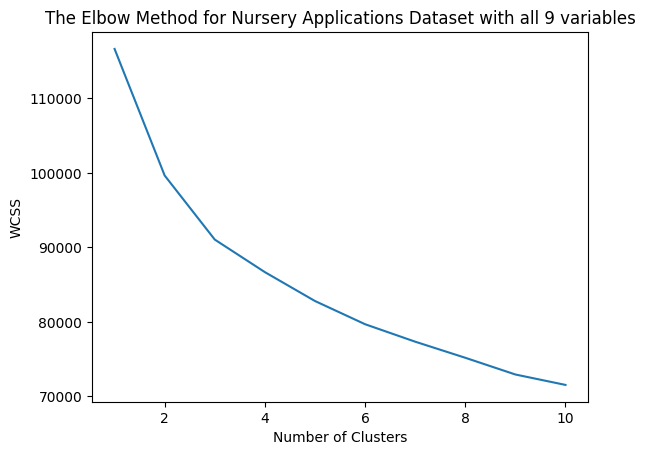

In [ ]:
#Objective_A_STEP2: Implementing the elbow method to find the optimal Best number of clusters for the Nursery Application dataset
#Computing the K-means cluster on Nursery dataset with K -value(cluster values) ranging between 1 to 11 and finding the best K (Elbow point on the plot)
#that provides optimal well separated clustering
#Importing the KMeans from the sklearn.cluster python package
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans_model = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans_model.fit(nursery_sc)
    wcss.append(kmeans_model.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method for Nursery Applications Dataset with all 9 variables")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

<b><big>Here, the wcss is the sum of squares. WCSS decreases rapidly but reduces slowly at 3. This is called <big>elbow point</big>. Therefore, this Elbow Point "3" is said to be the Cluster number for Nursery dataset.<BR/>
 <B>According the above graph, The Elbow point appears at 3 on the x- Axis Thus, the k value is 3</B></big></b>

<b>  <h4>Objective_A_STEP3: Fitting K-means Clustering with all 9 Variables with K value=3</h4>random_state =42 () is set for Same occurrences across different executions. <br/>
here, y_kmeans_label is a vector that contains the clusters labels/ tags that are created by applying Kmeans Clustering</b>

In [ ]:
#Objective_A_STEP3: Fitting the K-MEans model object to the dataset with random_state =42.
#randome_state is set to some numerical value to enable same occurrences across different executions
#here, y_kmeans_label is a vector that contains the clusters labels/ tags that are created by applying Kmeans Clustering
kmeans_model = KMeans(n_clusters = 3, init="k-means++", random_state=42)
y_kmeans_label = kmeans_model.fit_predict(nursery_sc)

<b><big>To print the length of the found clusters and its unique cluster numbers allocated by the K-means clustering algorithm</big></b>


In [ ]:
# To print the length of the found clusters and its unique cluster numbers allocated by the K-means clustering algorithm
print("The Length of y_kmeans_label {}  and unique values in y_kmeans_label are {} ". format(len(y_kmeans_label), np.unique(y_kmeans_label)))

The Length of y_kmeans_label 12960  and unique values in y_kmeans_label are [0 1 2] 


<b>Thus, All 12960 rows gets a cluster value information in the nursery dataset. There are three homogenous clusters</b>

In [ ]:
# Printing the 3 Cluster centers(centriods) for the 3 homogenous clusters
kmeans_model.cluster_centers_

array([[ 1.26099405e-17, -1.15134240e-17,  6.90101842e-05,
         2.07043336e-04,  1.36874203e-19, -1.54320989e-04,
         0.00000000e+00, -1.22474487e+00, -1.05614345e+00],
       [-2.83440146e-04,  1.63644245e-04, -4.48446415e-04,
        -3.10445215e-04,  1.36874248e-19,  9.99845691e-01,
        -2.83440146e-04,  6.12230716e-01,  5.58462906e-01],
       [ 2.83571399e-04, -1.63720023e-04,  3.79627915e-04,
         1.03497699e-04,  1.36874159e-19, -1.00015433e+00,
         2.83571399e-04,  6.12514221e-01,  4.97666470e-01]])

<h3><b>Objective_A_STEP4: Dimention Reduction using PCA. PCA is a linear dimensionality reduction technique.
PCA is applied before visualizing the clusters
</b></h3>

In [ ]:
#Objective_A_STEP4: Performing PCA. PCA is used to apply Dimentionality reduction before visualizing the clusters
#As it is notpossible to plot & show all 9 variables in 9 dimensions. Hence,  we do PCA for visualization
# Here,  PCA technique  used to reduce the Original dataset of 9 variables into two dimensionality array X,Y to plot on the graph
#"parents","has_nurs","form","children","housing","finance","social","health","class".
# Importing the PCA class from the sklearn.decomposition Python package for performing dimentionality reduction
from sklearn.decomposition import PCA
#Instantiating the PCA object with specification on number of components (or dimensions) that need to be retained. Here it is specified as 2 for plotting purpose of X,Y
pca_v9 = PCA(n_components=2)

# Ftting the object instance on the dataset using the fit_transform() method to perform PCA and return the fitted data with only two dimensions.
nursery_sc_reduced = pca_v9.fit_transform(nursery_sc)

#The percentage of variance that is attributed by each of the selected X & Y components.
pca_v9.explained_variance_ratio_

array([0.1817563 , 0.11118392])

<b>Visualizing the clusters differentiating by different colours on the Scatterplot</b>


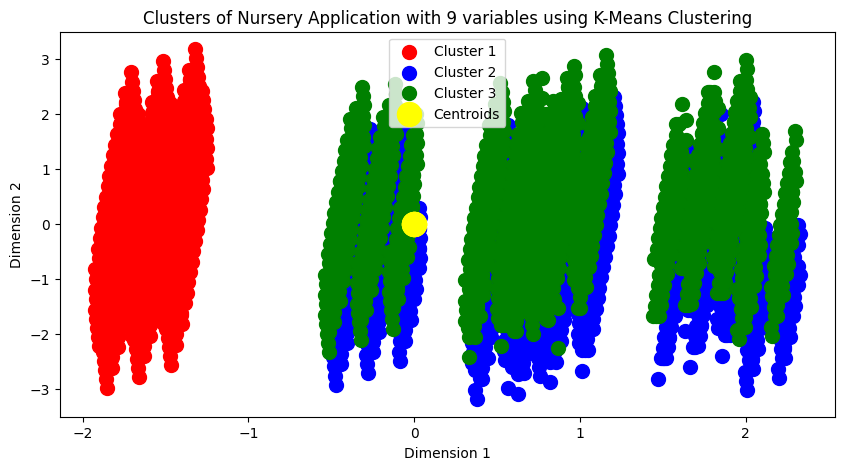

In [ ]:
#Objective_A_STEP5: Visualizing the clusters with different colours on the Scatterplot
# Visualization of the clusters
colours = ['red', 'blue', 'green']
#Setting the plot figure size
plt.figure(figsize=(10,5))
for i in range(3):
    plt.scatter(nursery_sc_reduced[y_kmeans_label == i,0], nursery_sc_reduced[y_kmeans_label==i, 1], s= 100, c = colours[i], label="Cluster "+ str(i+1))
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1],s=300, c='yellow', label='Centroids')
plt.title("Clusters of Nursery Application with 9 variables using K-Means Clustering")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [ ]:
#Objective_A_STEP6: Calculating the sum of explained variance of the PCA that is the amount of data retained from the Original data by PCA technique
#That is the sum of original data retained in the reduced two dimensional array
print("Sum of explained variance(with Original Data):",sum(pca_v9.explained_variance_ratio_))

#Note: Atleast 70% of the original variance should be retained by the two dimensions data.
#Here, 29% of the original variance is retained in the two dimensions array from Nursery data is still weak PCA performance.

Sum of explained variance(with Original Data): 0.29294021924619995


<big><b>Evaluating the Kmeans Model performance with all 9 variables using <br/>Silhoutte Score, Davies-Bouldin score and Calinski-Harabasz Score </b></big>

In [ ]:
#Objective_A_STEP7: Evaluating the Kmeans Model performance with all 9 variables
#Step7.1 using Silhoutte Score
from sklearn.metrics import silhouette_score
n_clusters =3
score = silhouette_score(nursery_sc,y_kmeans_label)
print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))



For n_clusters = 3, silhouette score is 0.1257796030359911)


sum(pca.explained_variance_ratio_) is 29% (which is less than 70%) means only 29% of original data is retained in the reduced dimension data through PCA</br>

<b>According to silhouette_score the clustering is poor and the sample is probably assigned to the wrong cluster </b>

In [ ]:
#Step7.2:  Evaluating the K-means clustering Model performance with all 9 variables
#using Davies-Bouldin Index & Calinski-Harabasz Score
#Davies-Bouldin
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(nursery_sc,  y_kmeans_label)
print("Davies-Bouldin Index: ",davies_bouldin)

#Calinski-Harabasz Score
from sklearn.metrics import calinski_harabasz_score
# Calculating the Calinski-Harabasz score for the nursery datset
ch_score = calinski_harabasz_score(nursery_sc, y_kmeans_label)
print(f"Calinski-Harabasz Score: {ch_score:.4f}")

Davies-Bouldin Index:  2.4219661837529034
Calinski-Harabasz Score: 1821.3606


<b><h4/>
 Clustering  performance metrics in terms of <br/>
1) Silhouetter Score is 0.125 (which is less than 0.5) mean poor Clustering performance.</br>
2) Davies-Bouldin: Not near to zero hence, not acceptable Clustering performance.</br>
3) Calinski-Harabasz Score: aroung 2000 is not a good score.</br>
Thus, all metrics including the Silhouetter Score are very less than the thresshold.Hence, proceeding the K-means clustering with reduced variables.
</h4>
</b>
Interpretation of Scores:  <br/>
Silhouetter Score must me above 0.5 threshold.
For Davies-Bouldin Index, lower values indicate better clustering performance. The best score is 0. For Calinski-Harabasz Index, the highest scores indicate better performance. The best score is ∞

In [ ]:
nursery_org_df.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


<h3><b>Analysis of Clusters' Pattern and its Interpretations </b></h3>

In [ ]:
#Step8: Cluster Analysis on Kmeans with 9 variables with 3 clusters
# Concatenaing the (variables & cluster values) two arrays by columnwise inorder to Analyse the Cluster details for the Nursery dataset nursery_df
Clust_Analysis_df = pd.DataFrame( np.column_stack((nursery_org_df, y_kmeans_label)),
         columns=["parents","has_nurs","form","children","housing","finance","social","health","class","cluster"])
#Displaying the first 5 rows of the cluster 0
Clust_Analysis_df[Clust_Analysis_df .cluster == 0].head()
#Data Pattern of Cluster=0: "health" and class having "not_recomm" regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom,0
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom,0
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom,0
11,usual,proper,complete,1,convenient,inconv,nonprob,not_recom,not_recom,0
14,usual,proper,complete,1,convenient,inconv,slightly_prob,not_recom,not_recom,0


<big><b>Data Pattern of Cluster=0: "health" and class having "not_recomm" regardless of values of other variables</b></big>

In [ ]:
Clust_Analysis_df[Clust_Analysis_df .cluster == 1].head()
#Data Pattern of Cluster==1: "health" having "recommendedand or priority" and class having "very_recom or priority"
#with finance having "inconv" regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom,1
10,usual,proper,complete,1,convenient,inconv,nonprob,priority,priority,1
12,usual,proper,complete,1,convenient,inconv,slightly_prob,recommended,very_recom,1
13,usual,proper,complete,1,convenient,inconv,slightly_prob,priority,priority,1
15,usual,proper,complete,1,convenient,inconv,problematic,recommended,priority,1


<big><b>Data Pattern of Cluster=1: "health" having "recommendedand or priority" and class having "very_recom or priority"
with finance having "inconv" regardless of values of other variables
</b></big>

In [ ]:
Clust_Analysis_df[Clust_Analysis_df .cluster == 2].head()
#Data Pattern of Cluster==2: "health" having "recommendedand or priority" and class having "very_recom or priority"
#with finance having "convenient" regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend,2
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority,2
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend,2
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority,2
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority,2


<big><b>Data Pattern of Cluster=2: "health" having "recommendedand or priority" and class having "very_recom or priority"
 with finance having "convenient" regardless of values of other variables
</b></big>

<b><h3>CLUSTERING OBJECTIVE B: K-means  Clustering Between 4 Variables: HEALTH, CHILDREN, HOUSING and CLASS</h3></b>

<b>Objective_B_Step1: Feature Selection by evaluating the correlation coefficients</b>

In [ ]:
#Objective_B_Step1: Feature Selection by evaluating the correlation coefficients which is a Data Preprocessing step.
#Evaluating and Sorting the correlation coefiecients focusing on the "class" variable
nursery_df.corr()['class'].sort_values(ascending=False).round(9)

class       1.000000
health      0.617910
children    0.031255
housing     0.024681
finance     0.020347
form        0.018736
has_nurs    0.008348
social     -0.000000
parents    -0.141516
Name: class, dtype: float64

<b>Based on the above correlation result, Proceeding to perform K-means clustering between "health","children","housing" and Nursery Application "class" </b>

In [ ]:
nursery_df.iloc[:,[3,4,7,8]].head()
#overviewing the "health","children","housing" and "class" columns

,children,housing,health,class
0,0.0,0.0,2.0,2.0
1,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,2.0
4,0.0,0.0,1.0,1.0


<b>Objective_B_Step2: Standardization through Scaling for 4 variables of Nursery Dataset</b>

In [ ]:
#Objective_B_Step2: Standardization through Scaling With 1 feature and 1 label
#(This step is the Data Transformation part of the Data Preprocessing)
from sklearn.preprocessing import StandardScaler

#Using  the StandardScaler to standardize the dataset to Find clusers between  4 variables
sc_X = StandardScaler()

#children, housing, health and class
nursery_sc_v4 = sc_X.fit_transform( nursery_df.iloc[:,[3,4,7,8]])

#Listing the first 5 rows of the array to ensure the dimension
print(nursery_sc_v4[:5, :])

[[-1.34143377 -1.22474487  1.22474487  0.48925783]
 [-1.34143377 -1.22474487  0.         -0.28344281]
 [-1.34143377 -1.22474487 -1.22474487 -1.05614345]
 [-1.34143377 -1.22474487  1.22474487  0.48925783]
 [-1.34143377 -1.22474487  0.         -0.28344281]]


<b><h4>Objective_B_STEP3: Elbow method to evaluate K value to find Optimal Best number of Clusters based on wcss value which is the sum of squares. Computation & plotting of the wcss helps to find the best K value(Elbow point on the plot) that provides optimal well separated Clusters</h4></b>

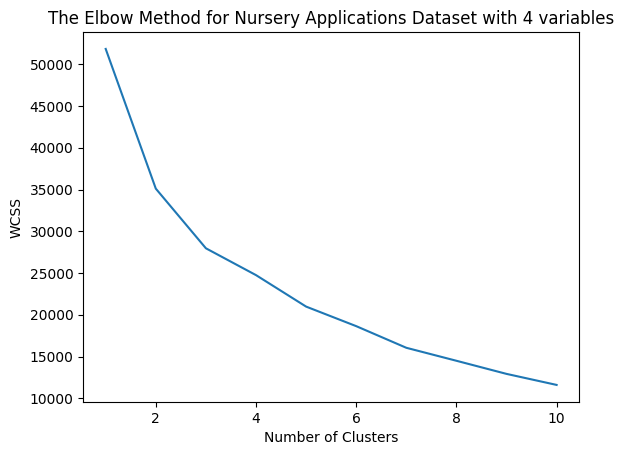

In [ ]:
#Objective_B_Step3: Implementing the elbow method to find the optimal Best number of clusters for the Nursery Application dataset
#Computing the K-means cluster on Nursery dataset with K -value(cluster values) ranging between 1 to 11 and finding the best K (Elbow point on the plot)
#that provides optimal well separated clustering
#Importing the KMeans Class from the sklearn.cluster Python Package
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    #randome_state is set to some numerical value to enable same occurrences across different executions
    kmeans_model1 = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans_model1.fit(nursery_sc_v4)
    wcss.append(kmeans_model1.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method for Nursery Applications Dataset with 4 variables")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()
 #This is called elbow point.
#hence, this elbow point is said to be the number of feasible well separated cluster for this dataset

  <B>According the above graph, wcss is the sum of squares. decreases rapily but reduces moreslowly at 5. The Elbow point appears at 5 on the x- Axis Thus, the k value is 5</B>

<b>Objective_B_Step4: Fitting the K-MEans model object to the dataset</b>

In [ ]:
#Objective_B_Step4: Fitting the K-MEans model object to the dataset
kmeans_model_v4 = KMeans(n_clusters = 5, init="k-means++", random_state=42)
y_kmeans_label_v4 = kmeans_model_v4.fit_predict(nursery_sc_v4)
#random_state =42 or any integer number is fine
#here, y_kmeans_label_v4 is a vector that contains the clusters labels/ tags that are created by applying Kmeans Clustering


<b><big>To print the length of the found clusters and its unique cluster numbers allocated by the K-means clustering algorithm</big></b>



In [ ]:
# To print the length of the found cluster and its unique cluster numbers allocated by the K-means clustering algorithm
print("Length of y_kmeans_label_v4  {}  and unique values in y_kmeans_label_v4 are {} ".
      format(len(y_kmeans_label_v4), np.unique(y_kmeans_label_v4)))
#There are five homogenous clusters

Length of y_kmeans_label_v4  12960  and unique values in y_kmeans_label_v4 are [0 1 2 3 4] 


#There are five homogenous clusters [0 1 2 3 4]

<b>Objective_B_STEP5: Performing PCA for Dimentionality reduction before visualizing the clusters</b>

In [ ]:
#Objective_B_STEP5: Performing PCA for Dimentionality reduction before visualizing the clusters
#As we cannot plot & show all 4 variables in 4 dimensions. Hence,  we do PCA for visualization
# Here,  PCA technique  used to reduce two dimensionality array of the Original dataset

#we can instantiate a PCA object. When instantiating it we define how many components (or dimensions) we want to retain.
#Here it is specified as 2 for plotting purpose of X,Y
#We then use the fit_transform() method to perform PCA and return the fitted data with only two dimensions.
#Since, There are 4 variables in the dataset, "children","housing","health" AND "class"
#Importing the PCA class of sklearn.decomposition python package to perform the dimentionality reduction
from sklearn.decomposition import PCA

#Here, 2 is specified since we need 2 dimensions for plotting purpose of X,Y
pca_v4 = PCA(n_components=2)
nursery_sc_reduced_v4 = pca_v4.fit_transform(nursery_sc_v4)
pca_v4.explained_variance_ratio_

array([0.40479486, 0.25006893])

In [ ]:
#Listing the  cluster centroids of 5 clusters
kmeans_model_v4.cluster_centers_

array([[-5.62250649e-01, -8.95053658e-01,  5.88556802e-01,
         6.60940045e-01],
       [ 9.23891218e-01, -8.01234963e-02, -1.03015924e+00,
        -9.33377927e-01],
       [-6.90941255e-01,  9.51851629e-01,  7.00789846e-01,
         2.00011599e-01],
       [-9.22171017e-01,  1.36707632e-19, -1.14819832e+00,
        -1.00784966e+00],
       [ 1.02707888e+00,  2.48173103e-01,  6.85127457e-01,
         8.02138688e-01]])

<b>Visualizing the clusters differentiating by different colours on the Scatterplot</b>


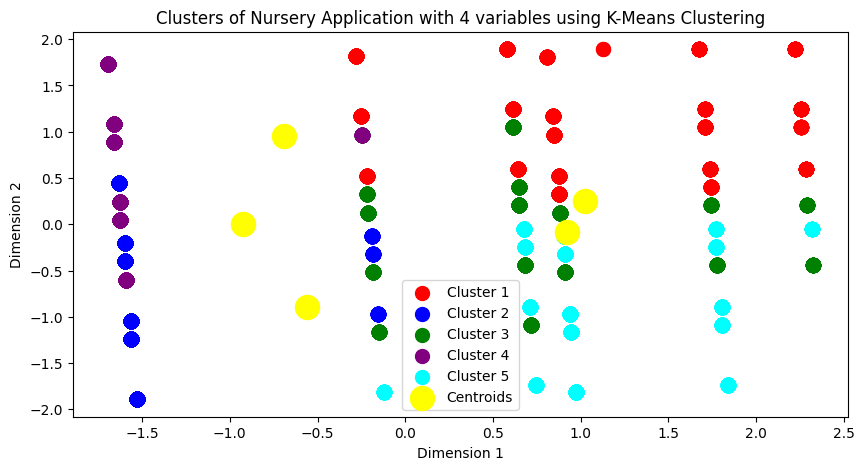

In [ ]:
#Objective_B_STEP6: Visualizing the clusters with different colours on the Scatterplot
# Visualization of the clusters
colours = ['red', 'blue', 'green','purple','cyan']

plt.figure(figsize=(10,5))
# i = 0 to 1 since K =5 in
for i in range(5):
    plt.scatter(nursery_sc_reduced_v4[y_kmeans_label_v4 == i,0],
                nursery_sc_reduced_v4[y_kmeans_label_v4==i, 1], s= 100, c = colours[i], label="Cluster "+ str(i+1))
plt.scatter(kmeans_model_v4.cluster_centers_[:,0], kmeans_model_v4.cluster_centers_[:,1],s=300, c='yellow', label='Centroids')
plt.title("Clusters of Nursery Application with 4 variables using K-Means Clustering")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [ ]:
#Objective_B_STEP7: Evaluating the sum of explained variance for PCA. The ratio of original data retained in the reduced two dimensional array.
print("Sum of explained variance(with Original Data):",sum(pca_v4.explained_variance_ratio_))
#Note: Atleast 70% of the original variance should be explained by the two dimensions data.
#Here, only 65% of the original variance is retained by the two dimensions that we have retained in Nursery data is =

Sum of explained variance(with Original Data): 0.654863784126647


<b>65% of original data is retained in the reduced dimension data. PCA performance is weak. </b>

<big><b>Evaluating the Kmeans Model performance on Nursery Dataset with 4 variables using Silhoutte Score, Davies-Bouldin score and Calinski-Harabasz Score </b></big>

In [ ]:
#Objective_B_STEP8: Evaluating the Kmeans Model performance with 4 variables
#Step8.1 using Silhoutte Score
from sklearn.metrics import silhouette_score
n_clusters =5
#score = silhouette_score(X, kmeans.labels_)
sil_score1 = silhouette_score(nursery_sc_v4,y_kmeans_label_v4)
print("K-means 4 variables For n_clusters = {}, silhouette score is {})".format(n_clusters, sil_score1))

#Typically, a silhouette score of 0.5 or higher is considered to indicate a reasonably good clustering. However, it is important
#to note that an ideal score is 1, and a score less than 0 indicates that the clustering is poor and the sample is probably assigned to the wrong cluster

K-means 4 variables For n_clusters = 5, silhouette score is 0.2779783899574967)


In [ ]:
#Step8.2: Evaluating the K-means clustering Model performance with 4 variables #using Davies-Bouldin Index & Calinski-Harabasz Score
#Evaluating the PErformance of K-means using two Other scores
#Davies-Bouldin
from sklearn.metrics import davies_bouldin_score
davies_bouldin1 = davies_bouldin_score(nursery_sc_v4,  y_kmeans_label_v4)
print("Davies-Bouldin Index: ",davies_bouldin1)

#Calinski-Harabasz Score
from sklearn.metrics import calinski_harabasz_score
# Calculating the Calinski-Harabasz score for the nursery datset
ch_score1 = calinski_harabasz_score(nursery_sc_v4, y_kmeans_label_v4)
print(f"Calinski-Harabasz Score: {ch_score1:.4f}")
# For Davies-Bouldin Index, lower values indicate better clustering performance.
#However, The best score is 0. For Calinski-Harabasz Index, the highest  scores indicate better performance. The best score is ∞

Davies-Bouldin Index:  1.2819518477297627
Calinski-Harabasz Score: 4763.9660


<h4><b>
1. The Silhouette Score is still  less than 0.5. Thus, poor Clustering performance.
</br>
2. Davies-Bouldin Index is greater than 1.3 and</br>
3. Calinski-Harabasz Score is just around 5,000. Thus the Evaluation Scores have improved.</br>
Proceeding to the next Objective
 </b>
</h4>

<h3><b>Analysis of Clusters' Pattern and its interpretation</b></h3>

In [ ]:
#Step9: Cluster Analysis on Kmeans with 5 clusters for 4 variables: "health","children","housing" and "class"
# Concatenaing the (variables & cluster values) two arrays by columnwise inorder to Analyse the Cluster details
#for the Nursery dataset nursery_df
#test = pd.DataFrame( np.column_stack((nursery_sc, y_kmeans_label)),
Clust_Analysis_df2 = pd.DataFrame( np.column_stack((nursery_org_df, y_kmeans_label_v4)),
         columns=["parents","has_nurs","form","children","housing","finance","social","health","class","cluster"])
#Displaying the first 5 rows of the cluster 0
Clust_Analysis_df2[Clust_Analysis_df2.cluster == 0 ].head()
#Clust_Analysis_df2[(Clust_Analysis_df2.cluster == 0) & (Clust_Analysis_df2.children.str.contains('more'))].head()
#Data Pattern of Cluster==0: Both "health" and "class" having "recommended and/or priority" with housing as "convenient"
# and Children ="1 or 2 or 3" only but not with "more"
#regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend,0
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend,0
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority,0
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority,0


<b>Data Pattern of Cluster=0: Both "health" and "class" having "recommended and/or priority" with housing as "convenient"
 and Children ="1 or 2 or 3" only but not with "more"
regardless of values of other variables</b>

In [ ]:
Clust_Analysis_df2[Clust_Analysis_df2.cluster == 1].head()
#Clust_Analysis_df2[(Clust_Analysis_df2.cluster == 1) & (Clust_Analysis_df2.children.str.contains('1'))].head()
#Data Pattern of Cluster==1: both "health" and "Class" having "not_recom"
#"children"  with values having "3 or more" but not with "1 or 2" regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
110,usual,proper,complete,3,convenient,convenient,nonprob,not_recom,not_recom,1
113,usual,proper,complete,3,convenient,convenient,slightly_prob,not_recom,not_recom,1
116,usual,proper,complete,3,convenient,convenient,problematic,not_recom,not_recom,1
119,usual,proper,complete,3,convenient,inconv,nonprob,not_recom,not_recom,1
122,usual,proper,complete,3,convenient,inconv,slightly_prob,not_recom,not_recom,1


<b>Data Pattern of Cluster=1: both "health" and "Class" having "not_recom"
"children"  with values having "3 or more" but not with "1 or 2" regardless of values of other variables</b>

In [ ]:
Clust_Analysis_df2[Clust_Analysis_df2.cluster == 2].head()
#Clust_Analysis_df2[(Clust_Analysis_df2.cluster == 2) & (Clust_Analysis_df2.children.str.contains('3'))].head()
#Data Pattern of Cluster=2: Both "health" and class having "recommended and/or priority" with housing as "less_conv"
# and "children" with value upto 3, but not more regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
18,usual,proper,complete,1,less_conv,convenient,nonprob,recommended,very_recom,2
19,usual,proper,complete,1,less_conv,convenient,nonprob,priority,priority,2
21,usual,proper,complete,1,less_conv,convenient,slightly_prob,recommended,very_recom,2
22,usual,proper,complete,1,less_conv,convenient,slightly_prob,priority,priority,2
24,usual,proper,complete,1,less_conv,convenient,problematic,recommended,priority,2


<b>Data Pattern of Cluster=2: Both "health" and class having "recommended and/or priority" with housing as "less_conv"
and "children" with value upto 3, but not more regardless of values of other variables </b>

In [ ]:
Clust_Analysis_df2[(Clust_Analysis_df2.cluster == 3)].head()
#Clust_Analysis_df[(Clust_Analysis_df.cluster == 3) & (Clust_Analysis_df.children == 'more')].head()
#Data Pattern of Cluster==3: "health" having "recommendedand or priority" and class having "very_recom or priority"
#with "children" having "1 or 2" only  but not with children having "3 or more" regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom,3
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom,3
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom,3
11,usual,proper,complete,1,convenient,inconv,nonprob,not_recom,not_recom,3
14,usual,proper,complete,1,convenient,inconv,slightly_prob,not_recom,not_recom,3


<b>Data Pattern of Cluster=3: "health" having "recommendedand or priority" and class having "very_recom or priority"
with "children" having "1 or 2" only  but not with children having "3 or more" regardless of values of other variables
</b>

In [ ]:
Clust_Analysis_df2[(Clust_Analysis_df2.cluster == 4)].head()
#Clust_Analysis_df[(Clust_Analysis_df.cluster == 4) & (Clust_Analysis_df.children == 'more')].head()
#Data Pattern of Cluster==4: "health" & "class" having "recommendedand or priority" but with housing as "critical" and
#with children having "3 or more" only regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
144,usual,proper,complete,3,critical,convenient,nonprob,recommended,priority,4
147,usual,proper,complete,3,critical,convenient,slightly_prob,recommended,priority,4
150,usual,proper,complete,3,critical,convenient,problematic,recommended,priority,4
153,usual,proper,complete,3,critical,inconv,nonprob,recommended,priority,4
156,usual,proper,complete,3,critical,inconv,slightly_prob,recommended,priority,4


<b>Data Pattern of Cluster=4: "health" & "class" having "recommendedand or priority" but with housing as "critical" and
with children having "3 or more" only regardless of values of other variables
</b>

<h3><b>CLUSTERING OBJECTIVE C: K-means  Clustering Between 2 Variables: HEALTH and CLASS</b></h3>

In [ ]:
#Objective_C_Step1: Feature Selection by evaluating the correlation coefficients which is a Data Preprocessing step.
#Evaluating and Sorting the correlation coefiecients with respect to the "class" variable
nursery_df.corr()['class'].sort_values(ascending=False).round(9)

class       1.000000
health      0.617910
children    0.031255
housing     0.024681
finance     0.020347
form        0.018736
has_nurs    0.008348
social     -0.000000
parents    -0.141516
Name: class, dtype: float64

<b>Based on the above correlation result, Proceeding to perform K-means clustering between "health" and Nursery Application "class" </b>

<b> Objective_C_Step2:  Standardization through Scaling With 2 Variables</b>

In [ ]:
#Objective_C_Step2:  Standardization/Normalization through Scaling on 2 Variables
#(This step is the Data Transformation part of the Data Preprocessing)
#Importing the StandardScaler class from the sklearn.preprocessing Python package to perform Standard Scaling
from sklearn.preprocessing import StandardScaler

#Using the StandardScaler to standardize the dataset To Find clusters between "health" and application "class"
sc_X = StandardScaler()
nursery_sc2 = sc_X.fit_transform( nursery_df.iloc[:,[7,8]])

#Listing the first 5 rows of the array to ensure the dimension
print(nursery_sc2[:5, :])

[[ 1.22474487  0.48925783]
 [ 0.         -0.28344281]
 [-1.22474487 -1.05614345]
 [ 1.22474487  0.48925783]
 [ 0.         -0.28344281]]


<b><h4>Objective_C_Step3: Elbow method to evaluate K value to find Optimal number of Clusters based on wcss value which is the sum of squares. Computation & plotting of the wcss helps to find the best K value(Elbow point on the plot) that provides optimal well separated Clusters</h4></b>

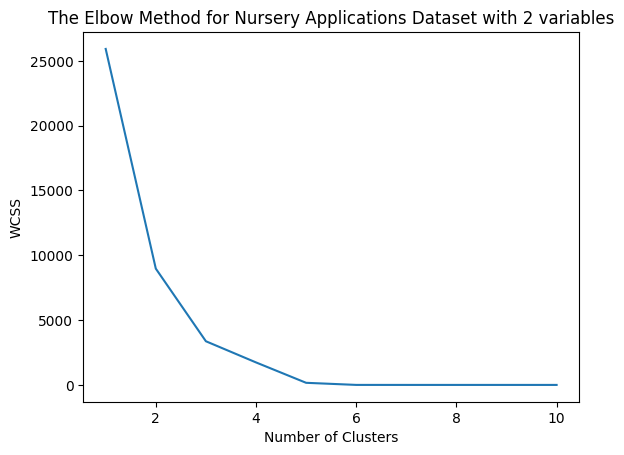

In [ ]:
#Objective_C_Step3: Implementing the elbow method to find the best number of clusters for the specific number of variables on the Nursery dataset
#wcss is the sum of squares. decreases rapily but reduces moreslowly at 5. This is called elbow point.
#hence, this elbow point is said to be the number of feasible well separated cluster for this dataset
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    #randome_state is set to some numerical value to enable same occurrences across different executions
    kmeans_model2 = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans_model2.fit(nursery_sc2)
    wcss.append(kmeans_model2.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method for Nursery Applications Dataset with 2 variables")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


 <B>According the above graph, The Elbow point clearly appears at 5 on the x- Axis Thus, the k value is 5</B>

 <h4><b> Objective_C_Step4: <b>  Fitting K-means Clustering with 2 Variables with K value=5 </b></h4>


In [ ]:
#Objective_C_Step4: Fitting the K-MEans model object to the dataset
kmeans_model2 = KMeans(n_clusters = 5, init="k-means++", random_state=42)
y_kmeans_label2 = kmeans_model2.fit_predict(nursery_sc2)
#random_state =42 or any integer number is fine
#here, y_kmeans_label2 is a vector that contains the clusters labels/ tags that are created by applying Kmeans Clustering

<b><big>To print the length of the found clusters and its unique cluster numbers allocated by the K-means clustering algorithm</big></b>

In [ ]:
# To print the length of the found cluster and its unique cluster numbers allocated by the K-means clustering algorithm
print("Length of y_kmeans_label2  {}  and unique values in y_kmeans_label2 are {} ".
      format(len(y_kmeans_label2), np.unique(y_kmeans_label2)))
#Thus, All 12960 rows gets a cluster value information in the nursery dataset
#There are five homogenous clusters [0 1 2 3 4]

Length of y_kmeans_label2  12960  and unique values in y_kmeans_label2 are [0 1 2 3 4] 


#There are five homogenous clusters [0 1 2 3 4] exist for the K-means Model kmeans_model2

In [ ]:
#Listing the Cluster Centroids
kmeans_model2.cluster_centers_

array([[ 0.        ,  1.26195846],
       [-1.22474487, -1.05614345],
       [ 1.22474487, -0.28280263],
       [ 1.22474487,  1.39493108],
       [ 0.        , -0.28344281]])

<b> PCA is not required to be performed since there are only 2 variables</b>

<b>Visualizing the clusters differentiating by different colours on the Scatterplot</b>


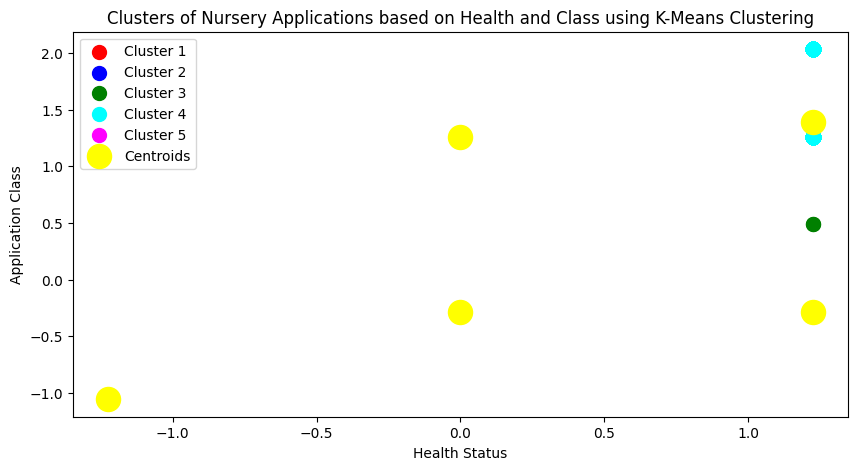

In [ ]:
#Objective_C_STEP5: Visualizing the clusters with different colours on the Scatterplot
#below code to display each cluster in a different colour in the Scatterplot

plt.figure(figsize=(10,5))
# x,Y cordinate of each cluster via y_means
# k values is 5 that means, Clusters are 0, 1,2,3,4
colours = ['red', 'blue', 'green','cyan','magenta']

for i in range(5):
    plt.scatter(nursery_sc2[y_kmeans_label2 == i,0], nursery_sc2[y_kmeans_label2==i, 1],
                s= 100, c = colours[i], label="Cluster "+ str(i+1))
plt.scatter(kmeans_model2.cluster_centers_[:,0], kmeans_model2.cluster_centers_[:,1],s=300, c='yellow', label='Centroids')
plt.title("Clusters of Nursery Applications based on Health and Class using K-Means Clustering")
plt.xlabel("Health Status")
plt.ylabel("Application Class")
plt.legend()
plt.show()

<big><b>Evaluating the Kmeans Model performance on Nursery Dataset with 2 variables using Silhoutte Score, Davies-Bouldin score and Calinski-Harabasz Score </b></big>

In [ ]:
#Objective_C_STEP6: Evaluating the Kmeans K-means clustering Model performance with 2 variables
#Step6.1 using Silhoutte Score
from sklearn.metrics import silhouette_score

n_clusters =5
#score = silhouette_score(X, kmeans.labels_)
sil_score2 = silhouette_score(nursery_sc2, y_kmeans_label2)
print("For K-meaans 2 variables: n_clusters = {}, silhouette score is {})".format(n_clusters, sil_score2))

For K-meaans 2 variables: n_clusters = 5, silhouette score is 0.9753582321956583)


In [ ]:
#Objective_C_Step6.2: Evaluating the K-means clustering Model performance with 2 variables
#using Davies-Bouldin Index & Calinski-Harabasz Score
#Davies-Bouldin for the nursery datset
from sklearn.metrics import davies_bouldin_score
davies_bouldin2 = davies_bouldin_score(nursery_sc2,  y_kmeans_label2)
print("Davies-Bouldin Index for 2nd Objective with K-means: ",davies_bouldin2)

#Calinski-Harabasz Score
from sklearn.metrics import calinski_harabasz_score
# Calculating the Calinski-Harabasz score for the nursery datset
ch_score2 = calinski_harabasz_score(nursery_sc2, y_kmeans_label2)
print(f"Calinski-Harabasz Score 2nd Objective with K-means: {ch_score2:.4f}")

Davies-Bouldin Index for 2nd Objective with K-means:  0.1317920368347897
Calinski-Harabasz Score 2nd Objective with K-means: 510743.0178


<p aligh='justify'>
<b>
<big>Conclusion on K-means Clustering between the objectives A, B & C </big><br/>
Before, the
Clustering of Multiple Categorical variables ("parents","has_nurs","form","children","housing","finance","social","health","class")
resulted in poor Silhouette Score, 0.113.
This Silhouette Score of 0.113 suggests that the clustering of the dataset using all 9 categorical  variables results in relatively weak cluster separation and cohesion.
It indicates that the clusters formed using these variables have a considerable degree of overlap and may not be well-defined.
<br/>
Also, theSilhouette Score =0.27 for 4 variables. Still poor clustering performance.
<br/>
</p>
<p aligh='justify'>
Now, Clustering on the data Subset of 2 Categorical variables ("health" and "class") resulted in Best Evaluation Scores <br/>
1. Silhouette Score of 0.97 is remarkably good score uusing only 2 variables, "health" and "class" which suggests significantly better cluster quality.<br/>

Other evaluated metrics (scores) such as  <br/>
2. Davies-Bouldin Index is near to Zero, which best score(0.13179203683478807) and<br/>
3. Calinski-Harabasz score is above half a million seems to be significantly best score(510743.0178)<br/>
This indicates that the clustering based on these two variables results in more distinct and well-separated clusters.<br/>
<big>Thus, kmeans_model2 is the best K-means model out of A, B & C Objectives for clustering Nursery dataset. </big><br/>
The results suggest that considering feature selection or dimensionality reduction techniques to focus on the most influential variables could lead to better cluster quality.</b>
<p/>

<b>Analysis of Clusters' Pattern and its Interpretations </b>

In [ ]:
#Step7: Cluster Analysis on Kmeans with 5 clusters for 2 variables: health and Class
# Concatenaing the (variables & cluster values) two arrays by columnwise inorder to Analyse the Cluster details
#for the Nursery dataset nursery_df
Clust_Analysis_df3 = pd.DataFrame( np.column_stack((nursery_org_df, y_kmeans_label_v4)),
         columns=["parents","has_nurs","form","children","housing","finance","social","health","class","cluster"])
#Displaying the first 5 rows of the cluster 0
Clust_Analysis_df3[Clust_Analysis_df3.cluster == 0 ].head(10)
#Clust_Analysis_df3[(Clust_Analysis_df3.cluster == 0) & (Clust_Analysis_df3.housing.str.contains('conv'))].head()
#Data Pattern of Cluster==0: "health" having "recommended" or "priority" and
#"class" having "recommended" or "very_recom" or "priority"
# and with "housing" having "convenient" #regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend,0
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend,0
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority,0
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority,0
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority,0
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom,0
10,usual,proper,complete,1,convenient,inconv,nonprob,priority,priority,0
12,usual,proper,complete,1,convenient,inconv,slightly_prob,recommended,very_recom,0
13,usual,proper,complete,1,convenient,inconv,slightly_prob,priority,priority,0


<b>
Data Pattern of Cluster=0: "health" having "recommended" or "priority" and
"class" having "recommended" or "very_recom" or "priority"
and with "housing" having "convenient" #regardless of values of other variables</b>

In [ ]:
Clust_Analysis_df3[Clust_Analysis_df3.cluster == 1].head()
# Clust_Analysis_df3[(Clust_Analysis_df3.cluster == 1) & (Clust_Analysis_df3.housing.str.contains('conv'))].head()
# Clust_Analysis_df3[(Clust_Analysis_df3.cluster == 1) & (Clust_Analysis_df3.housing.str.contains('inconv'))].head()
#Data Pattern of Cluster==1: both "health" and "Class" having "not_recom"
#and with "housing" having "convenient" only  regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
110,usual,proper,complete,3,convenient,convenient,nonprob,not_recom,not_recom,1
113,usual,proper,complete,3,convenient,convenient,slightly_prob,not_recom,not_recom,1
116,usual,proper,complete,3,convenient,convenient,problematic,not_recom,not_recom,1
119,usual,proper,complete,3,convenient,inconv,nonprob,not_recom,not_recom,1
122,usual,proper,complete,3,convenient,inconv,slightly_prob,not_recom,not_recom,1


<b>   
 Data Pattern of Cluster=1: both "health" and "Class" having "not_recom"
 and with "housing" having "convenient" only  regardless of values of other variables</b>

In [ ]:
Clust_Analysis_df3[Clust_Analysis_df3.cluster == 2].head(10)
#Clust_Analysis_df3[(Clust_Analysis_df3.cluster == 2) & (Clust_Analysis_df3.housing.str.contains('conv'))].head()
#Clust_Analysis_df3[(Clust_Analysis_df3.cluster == 2) & (Clust_Analysis_df3.housing.str.contains('inconv'))].head()
#Data Pattern of Cluster==2: "health" having "recommended" or "priority" and
#"class" having "very_recom" or "priority" only
#and especially with "housing" having "less_conv" only
# regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
18,usual,proper,complete,1,less_conv,convenient,nonprob,recommended,very_recom,2
19,usual,proper,complete,1,less_conv,convenient,nonprob,priority,priority,2
21,usual,proper,complete,1,less_conv,convenient,slightly_prob,recommended,very_recom,2
22,usual,proper,complete,1,less_conv,convenient,slightly_prob,priority,priority,2
24,usual,proper,complete,1,less_conv,convenient,problematic,recommended,priority,2
25,usual,proper,complete,1,less_conv,convenient,problematic,priority,priority,2
27,usual,proper,complete,1,less_conv,inconv,nonprob,recommended,very_recom,2
28,usual,proper,complete,1,less_conv,inconv,nonprob,priority,priority,2
30,usual,proper,complete,1,less_conv,inconv,slightly_prob,recommended,very_recom,2
31,usual,proper,complete,1,less_conv,inconv,slightly_prob,priority,priority,2


<b>Data Pattern of Cluster=2: "health" having "recommended" or "priority" and
"class" having "very_recom" or "priority" only
and especially with "housing" having "less_conv" only
regardless of values of other variables</b>

In [ ]:
Clust_Analysis_df3[(Clust_Analysis_df3.cluster == 3)].head(5)
#Clust_Analysis_df3[(Clust_Analysis_df3.cluster == 3) & (Clust_Analysis_df3.housing.str.contains('inconv'))].head()
##dbscan_Analysis_df[(dbscan_Analysis_df.cluster == 4) & (dbscan_Analysis_df.children.str.contains('more'))].head()
#Data Pattern of Cluster==3: both "health" and class having "not_recom"
#and with "children" having "1 or 2 or 3" only (NOT more) regardless of values of housing and other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom,3
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom,3
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom,3
11,usual,proper,complete,1,convenient,inconv,nonprob,not_recom,not_recom,3
14,usual,proper,complete,1,convenient,inconv,slightly_prob,not_recom,not_recom,3


<b>Data Pattern of Cluster==3: both "health" and class having "not_recom"
and with "children" having "1 or 2 or 3" only (NOT more) regardless of values of housing and other variables</b>

In [ ]:
Clust_Analysis_df3[(Clust_Analysis_df3.cluster == 4)].head(10)
#Clust_Analysis_df3[(Clust_Analysis_df3.cluster == 4) & (Clust_Analysis_df3.housing.str.contains('conv'))].head()
#Clust_Analysis_df3[(Clust_Analysis_df3.cluster == 4) & (Clust_Analysis_df3.children.str.contains('more'))].head()
#Data Pattern of Cluster==4: "health" having "recommended" and "class" having "priority"
#and "children" having "3" or "more" only (NOT 1 or 2)
#and "housing" having "critical" or "Convenient" only regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
144,usual,proper,complete,3,critical,convenient,nonprob,recommended,priority,4
147,usual,proper,complete,3,critical,convenient,slightly_prob,recommended,priority,4
150,usual,proper,complete,3,critical,convenient,problematic,recommended,priority,4
153,usual,proper,complete,3,critical,inconv,nonprob,recommended,priority,4
156,usual,proper,complete,3,critical,inconv,slightly_prob,recommended,priority,4
159,usual,proper,complete,3,critical,inconv,problematic,recommended,priority,4
162,usual,proper,complete,more,convenient,convenient,nonprob,recommended,very_recom,4
165,usual,proper,complete,more,convenient,convenient,slightly_prob,recommended,very_recom,4
168,usual,proper,complete,more,convenient,convenient,problematic,recommended,priority,4
174,usual,proper,complete,more,convenient,inconv,slightly_prob,recommended,priority,4


<b>Data Pattern of Cluster=4: "health" having "recommended" and "class" having "priority"
and "children" having "3" or "more" only (NOT 1 or 2)
and "housing" having "critical" or "Convenient" only regardless of values of other variables</b>

<h3><B>CLUSTERING OBJECTIVE D: DBSCAN  Clustering Between All 9 Variables
 </B><br/> USING THE ALREADY SCALED ARRAY "nursery_sc" USED IN TASK D</h3>

In [ ]:
#USING THE ALREADY SCALED ARRAY "nursery_sc" FOR TASK D
#Viewing first 10 records
nursery_sc[1:5]
#Evident that nursery_sc array contains the scaled data of 9 variables

array([[ 1.22474487,  0.70710678, -1.34148897, -1.34143377, -1.22474487,
        -1.00015433, -1.22474487,  0.        , -0.28344281],
       [ 1.22474487,  0.70710678, -1.34148897, -1.34143377, -1.22474487,
        -1.00015433, -1.22474487, -1.22474487, -1.05614345],
       [ 1.22474487,  0.70710678, -1.34148897, -1.34143377, -1.22474487,
        -1.00015433,  1.22474487,  1.22474487,  0.48925783],
       [ 1.22474487,  0.70710678, -1.34148897, -1.34143377, -1.22474487,
        -1.00015433,  1.22474487,  0.        , -0.28344281]])

<b>Calculating the the Nearest Neighbours to each point in the dataset nursery_sc</b>

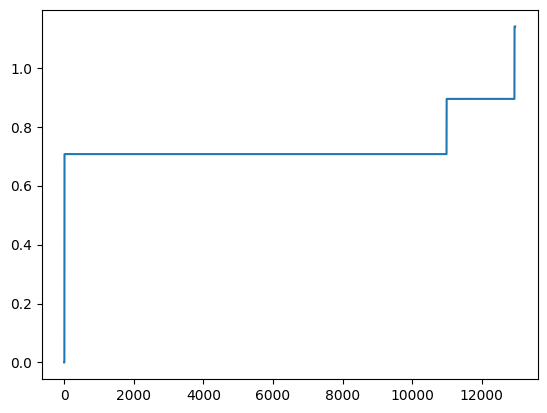

In [ ]:
#Objective_D_STEP1: Calculating the the Nearest Neighbours to each point in the
#dataset nursery_sc having 9 variables which is already scaled,
#sort the distances in ascending order and then plot this on a graph using matplotlib
from sklearn.neighbors import NearestNeighbors


dbs_neighbours = NearestNeighbors(n_neighbors=2)
dbs_distances, dbs_indices = dbs_neighbours.fit(nursery_sc).kneighbors(nursery_sc)

dbs_distances = dbs_distances[:,1]
dbs_distances = np.sort(dbs_distances, axis=0)
plt.plot(dbs_distances)
#use plt.show() to display the plot or use %matplotlib inline
plt.show()

<b>From the above graph We can see the distances start increasing rapidly at around zero itself. But we cannot put epsilon value as eps=0.0 Hence, we will select 0.05 as the epsilon value.</b>

<b>Objective_D_STEP2.1: Fitting the DBSCAN model object to the Nursery dataset  with parameters eps=0.05, min_samples=5 </b>

In [ ]:
#Objective_D_STEP2.1: Fitting the DBSCAN model object to the Nursery dataset
#Instantiating a DBSCAN object with parameters eps=0.05, min_samples=5 ,
#and use the fit_predict() method to train the model on nursery dataframe with 9 variables to generate an array of cluster assignments

#Importing the DBSCAN class from the sklearn.cluster python Package
from sklearn.cluster import DBSCAN

dbscan_model1 = DBSCAN(eps=0.05, min_samples=5)
y_dbscan_label_v8 = dbscan_model1.fit_predict(nursery_sc)

In [ ]:
#print(np.unique(y_dbscan_label_v8))
print("The Length of y_dbscan_label_v8 {}  and unique values in y_dbscan_label_v8are {} ". format(len(y_dbscan_label_v8), np.unique(y_dbscan_label_v8)))
# Apart from the -1 which indicate those points that are not assigned a cluster as they are considered to be noise or outliers.
#Gives numerous Clusters which shows week clustering performance.
#Tried with various epsilon values nearing to zero such as eps=0.01, eps=0.1 and even set value as eps= 0.7. Still same result.
#But,  When value is eps= 0.9 there were 0 to many But still theere are no clusters.
#Hence, this means no clusters found with parameters eps=0.05, min_samples=5 for the 9 variables of on Nursery dataset


The Length of y_dbscan_label_v8 12960  and unique values in y_dbscan_label_v8are [-1] 


<b>Objective_D_STEP2.2: Fitting the DBSCAN model object to the Nursery dataset  with parameters eps=0.7, min_samples=5 </b>

In [ ]:
#Objective_D_STEP2.2: Fitting the DBSCAN model object to the Nursery dataset
#Instantiating a DBSCAN object with parameters eps=0.7, min_samples=5 and use the fit_predict() method to train themodel on nursery dataframe with 9 variables
#to generate an array of cluster assignments
from sklearn.cluster import DBSCAN

#dbscan = DBSCAN(eps=0.01, min_samples=5)
dbscan_model1 = DBSCAN(eps=0.7, min_samples=5)
y_dbscan_label_v8 = dbscan_model1.fit_predict(nursery_sc)

In [ ]:
#Lets inspect the array to identify the number of clusters
y_dbscan_label_v8
print(np.unique(y_dbscan_label_v8))
#Values of -1 indicate those points that are not assigned a cluster as they are considered to be noise or outliers
#Tried with various epsilon values nearing to zero such as eps=0.01 or eps=0.1 and even set value as eps= 0.7.
# When value is eps= 0.9 there were 0 to
# But still theere are no clusters. Hence, this means no clusters found with parameters eps=0.7, min_samples=5 !


[-1]


<b>Objective_D_STEP2.3: Fitting the DBSCAN model object to the Nursery dataset  with parameters eps=0.9, min_samples=5</b>

In [ ]:
#Objective_F_STEP2.3: Fitting the DBSCAN model object to the Nursery dataset
#We can now instantiate a DBSCAN object with parameters eps=0.9, min_samples=5
#and use the fit_predict() method to train the model on nursery dataframe with 9 variables
#to generate an array of cluster assignments

#We can now instantiate a DBSCAN object, and use the fit_predict() method on this to generate an
#array of cluster assignment
from sklearn.cluster import DBSCAN

#dbscan = DBSCAN(eps=0.01, min_samples=5)
dbscan_model1 = DBSCAN(eps=0.9, min_samples=5)
y_dbscan_label_v8 = dbscan_model1.fit_predict(nursery_sc)

In [ ]:
#We can see the distances start increasing rapidly
#at 0 so we will select this as our value for epsilon.
#Lets inspect the array to identify the number of clusters
y_dbscan_label_v8
print(np.unique(y_dbscan_label_v8))
#Values of -1 indicate those points that are not assigned a cluster as they are considered to be noise or outliers
#Tried with various epsilon values nearing to zero such as eps=0.01, eps=0.1 and even set value as eps= 0.7.
# When value is eps= 0.9 there were 0 to
# But still theere are no clusters. Hence, this means no clusters found with parameters eps=0.9, min_samples=5 !
# Therefore, proceeding to perform cluster with 3 variables.


[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 24

<b>#Tried with various epsilon values nearing to zero such as eps=0.01, eps=0.1 and even set value as eps= 0.7.
When value is eps= 0.9 there were 0 to
But still theere are no clusters. Hence, this means no clusters found with parameters eps=0.9, min_samples=5.
<br/>
 This shows week clustering performance.
Thus, No clusters found for the Nursery dataset with all 9 variables.

Therefore,  terminating this and proceeding to perform cluster with 3 variables.</b>

<h3><b>CLUSTERING OBJECTIVE E: DBSCAN  Clustering Between 3 Variables<br/>
clustering between "health","children" and "class"</b></h3>

<b> Objective_E_Step1: Feature Selection by evaluating the correlation coefficients</b>

In [ ]:
#Objective_E_Step1: Feature Selection by evaluating the correlation coefficients which is a Data Preprocessing step.
#Evaluating and Sorting the correlation coefiecients focusing on the "class" variable
nursery_df.corr()['class'].sort_values(ascending=False).round(9)


class       1.000000
health      0.617910
children    0.031255
housing     0.024681
finance     0.020347
form        0.018736
has_nurs    0.008348
social     -0.000000
parents    -0.141516
Name: class, dtype: float64

<b>Objective_E_Step2:  Standardization through Scaling With 2 Variables</b>

In [ ]:
#Objective_E_Step2:  Standardization through Scaling With 2 Variables
from sklearn.preprocessing import StandardScaler

#Using the StandardScaler to standardize the dataset to Find clusers between "health" and application "class"
sc_X = StandardScaler()
nursery_sc3 = sc_X.fit_transform( nursery_df.iloc[:,[3,7,8]])

#Listing the first 5 rows of the array to ensure the dimension
print(nursery_sc3[:5, :])

[[-1.34143377  1.22474487  0.48925783]
 [-1.34143377  0.         -0.28344281]
 [-1.34143377 -1.22474487 -1.05614345]
 [-1.34143377  1.22474487  0.48925783]
 [-1.34143377  0.         -0.28344281]]


<b> Objective_E_STEP3: Calculating the Nearest Neighbours to each point</b>

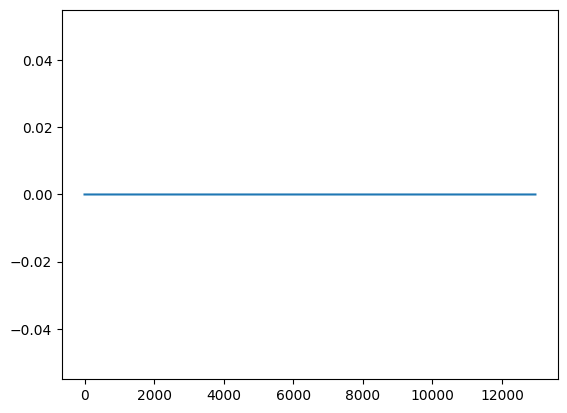

In [ ]:
#Objective_E_STEP3: Calculating the Nearest Neighbours to each point by sorting the distances in ascending order and then plot this on a graph using matplotlib
#importing NearestNeighbors  class from the sklearn.neighbors Python Package
from sklearn.neighbors import NearestNeighbors

dbs_neighbours = NearestNeighbors(n_neighbors=5)
dbs_distances, dbs_indices = dbs_neighbours.fit(nursery_sc3).kneighbors(nursery_sc3)

#sorting the distances in ascending order and then plot this on a graph using matplotlib
dbs_distances = dbs_distances[:,1]
dbs_distances = np.sort(dbs_distances, axis=0)
plt.plot(dbs_distances)
#use plt.show() to display the plot or use %matplotlib inline
plt.show()

<b> The nearest neighbors results in a straight line, it typically suggests that the data points are uniformly distributed or that there is no significant variation in the distances to their nearest neighbors. In other words,
all points in the dataset have approximately the same distance to their two nearest neighbors.</b>

<b>  <h4>Objective_E_STEP4: Fitting DBSCAN Clustering with 3 Variables with parameters eps=0.1, min_samples=5 </h4>
</b>

In [ ]:
#Objective_E_STEP4: Fitting the DBSCAN model object to the Nursery dataset
#Instantiate a DBSCAN object, and use the fit_predict() method on this to generate an
#array of cluster assignment
from sklearn.cluster import DBSCAN

dbscan_model_v3 = DBSCAN(eps=0.1, min_samples=5)
y_dbscan_label_v3 = dbscan_model_v3.fit_predict(nursery_sc3)

<b><big>To print the length of the found clusters and its unique cluster numbers allocated by the DBSCAN clustering algorithm</big></b>


In [ ]:
#Lets inspect the array to identify the number of clusters
y_dbscan_label_v3
print(np.unique(y_dbscan_label_v3))
#[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
#Values of -1 indicate those points that are not assigned a cluster as they are considered to be noise or outliers
#The value 0 to 23 are considered as valid clusters

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23]


<h3><b>Objective_E_STEP5: Dimention Reduction using PCA. PCA is a linear dimensionality reduction technique.
PCA is applied before visualizing the clusters
</b></h3>

In [ ]:
#Objective_E_STEP5: Performing PCA for Dimentionality reduction before visualizing the clusters
#As we cannot plot & show all 3 variables in 3 dimensions. Hence,  we do PCA for visualization
#"children","health" AND "class"
# Here,  PCA technique  used to reduce two dimensionality array of the Original dataset

#we can instantiate a PCA object. When instantiating it we define how many components (or dimensions)
#we want to retain. We then use the fit_transform() method to perform PCA and return the fitted data with only two dimensions.

from sklearn.decomposition import PCA
#Here, 2 is specified since we need 2 dimension for plotting purpose of X,Y
pca_E = PCA(n_components=2)
nursery_sc_reduced_F = pca_E.fit_transform(nursery_sc3)
pca_E.explained_variance_ratio_

array([0.53956227, 0.33334186])

<b>Visualizing the clusters differentiating by different colours on the Scatterplot</b>


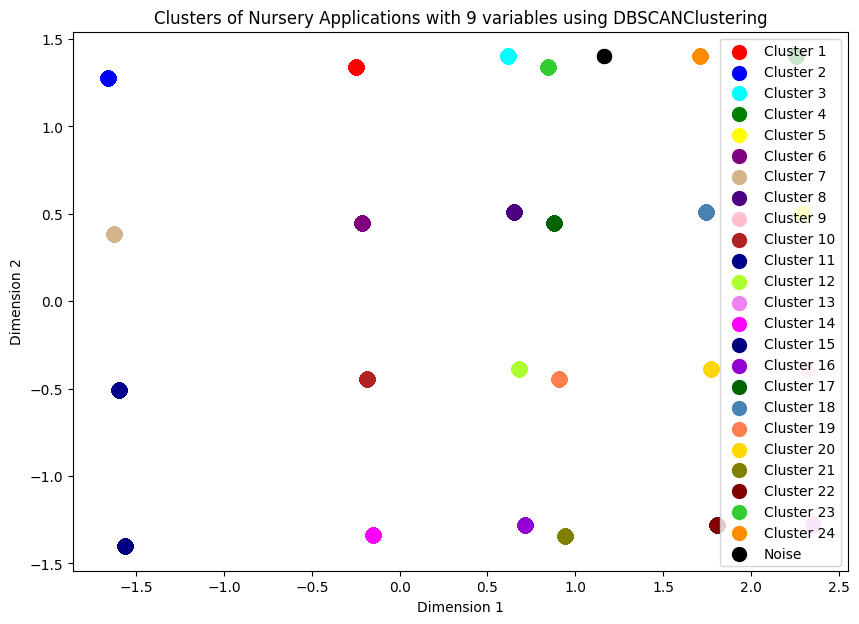

In [ ]:
#Objective_E_STEP6: Visualizing the Cluster created by DBSCAN Clustering method on the Scatterplot
plt.figure(figsize=(10,7))
num_clusters = 24
colours = ['red','blue','cyan','green','yellow','purple','tan','indigo','pink','firebrick',
           'darkblue','greenyellow','violet','magenta','navy','darkviolet','darkgreen','steelblue',
           'coral','gold','olive','maroon','limegreen','darkorange']
#for i in range(5):
for i in range(num_clusters):
    plt.scatter(nursery_sc_reduced_F[y_dbscan_label_v3 == i,0], nursery_sc_reduced_F[y_dbscan_label_v3==i, 1],
                s= 100, c = colours[i], label="Cluster "+ str(i+1))
#Displaying the Noise that is -1 cluster
plt.scatter(nursery_sc_reduced_F[y_dbscan_label_v3  == -1,0], nursery_sc_reduced_F[y_dbscan_label_v3 == -1,-1], s = 100, c='black',label='Noise')


plt.title("Clusters of Nursery Applications with 9 variables using DBSCANClustering")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [ ]:
#Objective_E_STEP7: Calculating the sum of explained variance that is the amount of data retained from the Original data by PCA technique
print("Sum of explained variance(with Original Data):",sum(pca_E.explained_variance_ratio_))

#Here, 87% of the original variance is explained by the two dimensions that we have retained in our data is remarkably good PCA performance.

Sum of explained variance(with Original Data): 0.8729041297407318


<b>87% of original data is retained in the reduced dimension data. PCA's data retaining performance is significantly  Good </b>

<big><b>Evaluating the DBSCAN Model performance on Nursery Dataset with 3 variables using Silhoutte Score, Davies-Bouldin score and Calinski-Harabasz Score </b></big>

In [ ]:
#Objective_E_STEP8: Evaluating the DBSCAN Model performance with 3 variables
#Step8.1 using Silhoutte Score
from sklearn.metrics import silhouette_score
n_clusters = num_clusters
#score = silhouette_score(X, kmeans.labels_)
sil_score_dbscan = silhouette_score(nursery_sc3,y_dbscan_label_v3)
print("For DBSCAN with 3 variables: n_clusters = {}, silhouette score is {})".format(n_clusters, sil_score_dbscan))

#Typically, a silhouette score Score near +1: Well-separated clusters
#For n_clusters = 6, silhouette score is 1.0 is the best score

For DBSCAN with 3 variables: n_clusters = 24, silhouette score is 1.0)


In [ ]:
#F_Step8.2: Evaluating the DBSCAN Model performance with 3 variables using Davies-Bouldin Index & Calinski-Harabasz Score
#Davies-Bouldin
from sklearn.metrics import davies_bouldin_score
davies_bouldin_dbscan = davies_bouldin_score(nursery_sc2, y_dbscan_label_v3)
print("Davies-Bouldin Index: ",davies_bouldin_dbscan.round(5))

#Calinski-Harabasz Score
from sklearn.metrics import calinski_harabasz_score
# Calculating the Calinski-Harabasz score for the nursery datset
ch_score_dbscan = calinski_harabasz_score(nursery_sc3, y_dbscan_label_v3)
print(f"Calinski-Harabasz Score: {ch_score_dbscan:.4f}")

Davies-Bouldin Index:  0.24
Calinski-Harabasz Score: 8878016421660079414828272189440.0000


<big> <b>All 3 evaluation metrics have given best scores that shows that Model has well performed in identifying Well seperated Clusters</b></big>
<h4>Though, The  evaluation metrics of DBSCAN clustering on 3 variables are significantly good however the number of cluster are very high!.<br/>
Hence, proceeding to the next test to find the performance DBSCAN clustering on 2 variables </h4>

<h3><B>CLUSTERING OBJECTIVE F: DBSCAN  Clustering Between 2 Variables<BR/>
clustering between "health",  and "class"<BR/>
USING THE ALREADY SCALED ARRAY "nursery_sc2" WITH SAME 2 ATTRIBUTES</B></h3>

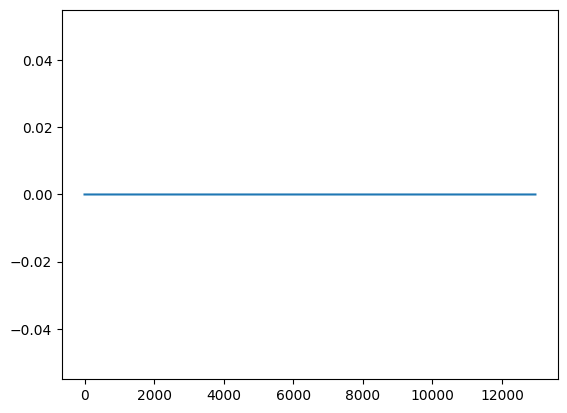

In [ ]:
#Objective_F_STEP1: Calculating the the Nearest Neighbours to each point on the
#dataset nursery_sc2 having 2 variables which is already scaled,
#Importing the NearestNeighbors class from the sklearn.neighbors Python package
from sklearn.neighbors import NearestNeighbors

dbs_neighbours = NearestNeighbors(n_neighbors=5)
dbs_distances, dbs_indices = dbs_neighbours.fit(nursery_sc2).kneighbors(nursery_sc2)

dbs_distances = dbs_distances[:,1]

#sort the distances in ascending order and then plot this on a graph using matplotlib
dbs_distances = np.sort(dbs_distances, axis=0)
plt.plot(dbs_distances)
#using plt.show() to display the plot
plt.show()

<b> The nearest neighbors results in a straight line, it typically suggests that the data points are uniformly distributed or that there is no significant variation in the distances to their nearest neighbors. In other words,
all points in the dataset have approximately the same distance to their two nearest neighbors.</b>

<b>Objective_F_STEP2: Fitting the DBSCAN model object to the Nursery dataset </b>

In [ ]:
#Objective_F_STEP2: Fitting the DBSCAN model object to the Nursery dataset
#We can now instantiate a DBSCAN object, and use the fit_predict() method on this to generate an
#array of cluster assignment
from sklearn.cluster import DBSCAN

#dbscan = DBSCAN(eps=0.25, min_samples=5)
dbscan_model = DBSCAN(eps=0.1, min_samples=5)
y_dbscan_label = dbscan_model.fit_predict(nursery_sc2)

In [ ]:
#Inspecting the array to identify the number of clusters generated by dbscan_model for the Nursery dataset on 2 variables
y_dbscan_label
print(np.unique(y_dbscan_label))
#[-1  0  1  2  3  4  5]
#Values of -1 indicate those points that are not assigned a cluster as they are considered to be Noise or outliers
#The value 0 to 5 are considered as valid clusters/

[-1  0  1  2  3  4  5]


#There are six homogenous clusters [-1  0  1  2  3  4  5] exist in the "dbscan_model" DBSCAN model

<b> PCA is not required to be performed since there are only 2 variables</b>

<b>Visualizing the clusters differentiating by different colours on the Scatterplot</b>


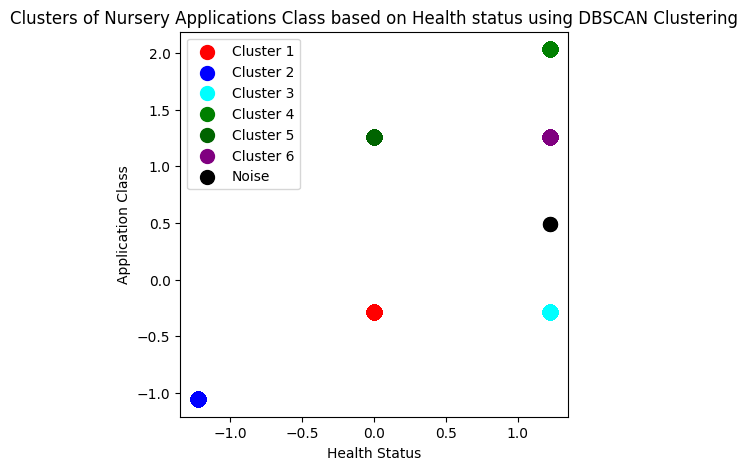

In [ ]:
#Objective_F_STEP3: Visualizing the Cluster created by DBSCAN Clustering method
plt.figure(figsize=(5,5))
num_clusters = 6
colours = ['red','blue','cyan','green','darkgreen','purple']
#for i in range(5):
for i in range(num_clusters):
    plt.scatter(nursery_sc2[y_dbscan_label == i,0], nursery_sc2[y_dbscan_label ==i, 1],
                s= 100, c = colours[i], label="Cluster "+ str(i+1))

#Displaying the Noise that is -1 cluster
plt.scatter(nursery_sc2[y_dbscan_label == -1,0], nursery_sc2[y_dbscan_label== -1,-1], s = 100, c='black',label='Noise')

plt.title("Clusters of Nursery Applications Class based on Health status using DBSCAN Clustering")
plt.xlabel("Health Status")
plt.ylabel("Application Class")
plt.legend()
plt.show()

<big><b>Evaluating the DBSCAN Model performance on Nursery Dataset with 2 variables using Silhoutte Score, Davies-Bouldin score and Calinski-Harabasz Score  </b></big>

In [ ]:
#Objective_F_STEP4: Evaluating the DBSCAN Model performance with 2 variables
#Step4.1 using Silhoutte Score
from sklearn.metrics import silhouette_score
n_clusters = num_clusters
#score = silhouette_score(X, kmeans.labels_)
sil_score_dbscan = silhouette_score(nursery_sc2,y_dbscan_label)
print("For DBSCAN with 2 variables: n_clusters = {}, silhouette score is {})".format(n_clusters, sil_score_dbscan))

#Typically, a silhouette score Score near +1: Well-separated clusters
#For DBSCAN with 2 variables & n_clusters = 6, silhouette score is 1.0

For DBSCAN with 2 variables: n_clusters = 6, silhouette score is 1.0)


In [ ]:
#G_Step4.2: Evaluating the DBSCAN Model performance with 2 variables using Davies-Bouldin Index & Calinski-Harabasz Score
#Davies-Bouldin
from sklearn.metrics import davies_bouldin_score
davies_bouldin_dbscan = davies_bouldin_score(nursery_sc2, y_dbscan_label)
print("Davies-Bouldin Index: ",davies_bouldin_dbscan)

#Calinski-Harabasz Score
from sklearn.metrics import calinski_harabasz_score
# Calculating the Calinski-Harabasz score for the nursery datset
ch_score_dbscan = calinski_harabasz_score(nursery_sc2, y_dbscan_label)
print(f"Calinski-Harabasz Score: {ch_score_dbscan:.4f}")
# Davies-Bouldin Index:  0.0 Is a best score.
# Calinski-Harabasz Score: 2211579823180807225242321682432.0000 is a  best score

Davies-Bouldin Index:  0.0
Calinski-Harabasz Score: 2211579823180807225242321682432.0000


<b>
<h5>The DBSCAN  "dbscan_model" model with 2 variables of Nursery dataset gives 6 clsuters with significantly highest Evaluation metrics<br/>
Silhouette score is 1.0  <br/>
Davies-Bouldin Index: 0.0 <br/>
Calinski-Harabasz Score: 2211579823180807225242321682432.0000 <br/>
Thus, with these highest evaluation scores the DBSCAN turns to be one of best suitable model for clustering with 2 variables on Nursery Applications dataset  however the "kmeans_model2"  Objective C K-means model has also attained highest silhouettte score is 0.97 <br/>
Davies-Bouldin Index: 0.13179203683478807 <br/>
Calinski-Harabasz Score: 510743.0178<br/>
with reduced number of clusters of 5.<br/>

</b><br/>
<h2><B>CONCLUSION</B></h2>
<p align="justify">
 <big><b> Because, DBSCAN has gained best scores in all 3 evaluation metrics  that portrays as best DBSCAN Model well performed in identifying Well seperated Clusters in this case. <br/>
Because, The DBSCAN model "dbscan_model" with 2 variables on Nursery dataset could be concluded as the one of the Best Model for Nursery dataset because,  the number of cluster are more than Objective C K-means. K-means "kmeans_model2" has also have significantly  higher Silhouette score of 97% and with best scores of Davies-Bouldin Index & Calinski-Harabasz Score on top of having lesser number of cluster,i.e., 5 when comparing to the DBSCAN "dbscan_model" with 6 clusters. Hence, K-means with 2 variables is also an equally a best model when given the importance on reduced clusters.<br/>

<big>Thus, both "kmeans_model2" and "dbscan_model" are equally a good performer in identifying the well separated clusters within the models of 6 tasks' objectives A,B,C,D, E & F</big>

 </b></big></p>

<h3><b>Analysis of Clusters' Pattern and its Interpretations </b></h3>

In [ ]:
#G_Step5: Cluster Analysis on DBSCAN with 6 clusters for 2 variables: health and Class
# Concatenaing the (variables & cluster values) two arrays by columnwise inorder to Analyse the Cluster details for the Nursery dataset nursery_org_df
dbscan_Analysis_df = pd.DataFrame( np.column_stack((nursery_org_df, y_dbscan_label)),
         columns=["parents","has_nurs","form","children","housing","finance","social","health","class","cluster"])
#Displaying the first 5 rows of the cluster 0
dbscan_Analysis_df[dbscan_Analysis_df.cluster == 0 ].head(5)
#Data Pattern of Cluster=0: both "health" & "class" having "priority" regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority,0
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority,0
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority,0
10,usual,proper,complete,1,convenient,inconv,nonprob,priority,priority,0
13,usual,proper,complete,1,convenient,inconv,slightly_prob,priority,priority,0


<b>Data Pattern of Cluster=0: both "health" & "class" having "priority" regardless of values of other variables
</b>

In [ ]:
dbscan_Analysis_df[dbscan_Analysis_df.cluster == 1].head()
#dbscan_Analysis_df[dbscan_Analysis_df.cluster == 1].head(50)
#Data Pattern of Cluster=1: both "health" and "Class" having "not_recom" # regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom,1
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom,1
8,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom,1
11,usual,proper,complete,1,convenient,inconv,nonprob,not_recom,not_recom,1
14,usual,proper,complete,1,convenient,inconv,slightly_prob,not_recom,not_recom,1


<b>Data Pattern of Cluster=1: both "health" and "Class" having "not_recom" regardless of values of other variables.
</b>

In [ ]:
dbscan_Analysis_df[dbscan_Analysis_df.cluster == 2].head(5)
#Data Pattern of Cluster=2: when "health" is having "recommended" and "Class" having "priority" regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority,2
15,usual,proper,complete,1,convenient,inconv,problematic,recommended,priority,2
24,usual,proper,complete,1,less_conv,convenient,problematic,recommended,priority,2
33,usual,proper,complete,1,less_conv,inconv,problematic,recommended,priority,2
42,usual,proper,complete,1,critical,convenient,problematic,recommended,priority,2


<b>Data Pattern of Cluster=2: when "health" is having "recommended" and "Class" having "priority" regardless of values of other variables.
</b>

In [ ]:
dbscan_Analysis_df[(dbscan_Analysis_df.cluster == 3)].head()
#dbscan_Analysis_df[(dbscan_Analysis_df.cluster == 3)].head(50)
#Data Pattern of Cluster=2: when "health" is having "recommended" and "Class" having "very_recom" regardless of values of other variables

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
9,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom,3
12,usual,proper,complete,1,convenient,inconv,slightly_prob,recommended,very_recom,3
18,usual,proper,complete,1,less_conv,convenient,nonprob,recommended,very_recom,3
21,usual,proper,complete,1,less_conv,convenient,slightly_prob,recommended,very_recom,3
27,usual,proper,complete,1,less_conv,inconv,nonprob,recommended,very_recom,3


<b><p align="justify">#Data Pattern of Cluster=2: when "health" is having "recommended" and "Class" having "very_recom" regardless of values of other variables.</p></b>

In [ ]:
dbscan_Analysis_df[(dbscan_Analysis_df.cluster == 4)].head()
#Data Pattern of Cluster=4: when "health" is having "priority" and "Class" having "spec_prior" regardless of values of other variables.

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
2683,usual,critical,complete,2,critical,convenient,nonprob,priority,spec_prior,4
2686,usual,critical,complete,2,critical,convenient,slightly_prob,priority,spec_prior,4
2689,usual,critical,complete,2,critical,convenient,problematic,priority,spec_prior,4
2692,usual,critical,complete,2,critical,inconv,nonprob,priority,spec_prior,4
2695,usual,critical,complete,2,critical,inconv,slightly_prob,priority,spec_prior,4


<b><p align="justify">#Data Pattern of Cluster=4: when "health" is having "priority" and "Class" having "spec_prior" regardless of values of other variables.</p></b>

In [ ]:
dbscan_Analysis_df[(dbscan_Analysis_df.cluster == 5)].head()
##Data Pattern of Cluster=5: when "health" is having "recommended" and "Class" having "spec_prior" regardless of values of other variables.
#In this case, the social is noted to be all "problematic"

,parents,has_nurs,form,children,housing,finance,social,health,class,cluster
2688,usual,critical,complete,2,critical,convenient,problematic,recommended,spec_prior,5
2697,usual,critical,complete,2,critical,inconv,problematic,recommended,spec_prior,5
2715,usual,critical,complete,3,convenient,inconv,problematic,recommended,spec_prior,5
2724,usual,critical,complete,3,less_conv,convenient,problematic,recommended,spec_prior,5
2733,usual,critical,complete,3,less_conv,inconv,problematic,recommended,spec_prior,5


<b>Data Pattern of Cluster=5: when "health" is having "recommended" and "Class" having "spec_prior" regardless of values of other variables.<br/>
In this case, the social is noted to be all "problematic"
</b>

<b> CLUSTERING TASK ENDS HERE</b>